##Instalasi Library

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

## Upload Dataset File

In [3]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  try:
    df_tj = pd.read_csv(io.BytesIO(uploaded[fn]))
    print("Successfully loaded CSV into df_tj")
  except pd.errors.ParserError:
      print(f"Error: Could not parse {fn} as a CSV. Please upload a valid CSV file.")
      df_tj = pd.DataFrame() # Create an empty DataFrame if parsing fails
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_tj = pd.DataFrame()


Saving df_tj to df_tj
User uploaded file "df_tj" with length 856257 bytes
Successfully loaded CSV into df_tj


In [4]:
df_tj

reviewId         userName  \
0     01a956bc-8356-4eec-8bd6-85644d311be0  Pengguna Google   
1     234b7bb0-8ce0-498a-9644-088811e7a521  Pengguna Google   
2     06a6c78b-8a8d-4395-9ab7-7ecdd405e7f9  Pengguna Google   
3     9ec5f40b-63e5-46d3-a9cf-85f8aa8bda29  Pengguna Google   
4     3f1c44b5-aef1-4228-aaa2-d647488808c4  Pengguna Google   
...                                    ...              ...   
2741  cdd9f5f2-b4cb-44c2-814e-860e0688f3d5  Pengguna Google   
2742  66859930-33cc-484a-9c0a-f25534958578  Pengguna Google   
2743  eb386bcd-d074-448e-b636-8f8b4d20ecb1  Pengguna Google   
2744  43b40878-dcff-44b8-bed5-2dfb89bc0880  Pengguna Google   
2745  af86170d-586d-4c48-9963-e45418088147  Pengguna Google   

                                              userImage  \
0     https://play-lh.googleusercontent.com/EGemoI2N...   
1     https://play-lh.googleusercontent.com/EGemoI2N...   
2     https://play-lh.googleusercontent.com/EGemoI2N...   
3     https://play-lh.googleusercontent.com/EGemoI2N...   
4     https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                 ...   
2741  https://play-lh.googleusercontent.com/EGemoI2N...   
2742  https://play-lh.googleusercontent.com/EGemoI2N...   
2743  https://play-lh.googleusercontent.com/EGemoI2N...   
2744  https://play-lh.googleusercontent.com/EGemoI2N...   
2745  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                content  score  thumbsUpCount  \
0     Udah hampir sempurna ini, mungkin bisa ditingk...      5              0   
1     kesalahan yang sering terjadi, versi yang lebi...      4              0   
2                                                    ok      5              0   
3     Tolong Gate scan nya Di perbaiki dan di bikin ...      5              0   
4     aplikasi tidak bisa memasukan kode otp selalu ...      3              0   
...                                                 ...    ...            ...   
2741                                            Mantaps      5              5   
2742              Sudah enggak crash kalau pilih profil      5              7   
2743  Aplikasi kocag, gk becus bikin aplikasi, masuk...      1              7   
2744  Aplikasi gak jelas, server eror, loading lama,...      1             23   
2745                                               wihh      5              2   

     reviewCreatedVersion                   at  \
0                   2.7.1  2025-09-06 12:30:06   
1                   2.7.1  2025-09-06 11:03:16   
2                   2.7.1  2025-09-06 04:19:05   
3                   2.7.1  2025-09-06 01:45:32   
4                     NaN  2025-09-05 17:19:45   
...                   ...                  ...   
2741                  1.4  2024-05-16 11:10:02   
2742                  1.8  2024-05-16 04:52:59   
2743                  1.4  2024-05-12 09:42:40   
2744                  1.4  2024-05-11 13:43:39   
2745                  NaN  2024-05-07 09:26:49   

                                           replyContent            repliedAt  \
0                                                   NaN                  NaN   
1                                                   NaN                  NaN   
2                                                   NaN                  NaN   
3                                                   NaN                  NaN   
4                                                   NaN                  NaN   
...                                                 ...                  ...   
2741                                                NaN                  NaN   
2742                                                NaN                  NaN   
2743                                                NaN                  NaN   
2744  Halo Teguh Aliansyah,\nTerima kasih untuk masu...  2024-05-23 06:29:46   
2745                                                NaN                  NaN   

     appVersion  
0         2.7.1

In [5]:
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2746 non-null   object
 1   userName              2746 non-null   object
 2   userImage             2746 non-null   object
 3   content               2746 non-null   object
 4   score                 2746 non-null   int64 
 5   thumbsUpCount         2746 non-null   int64 
 6   reviewCreatedVersion  2324 non-null   object
 7   at                    2746 non-null   object
 8   replyContent          4 non-null      object
 9   repliedAt             4 non-null      object
 10  appVersion            2324 non-null   object
dtypes: int64(2), object(9)
memory usage: 236.1+ KB


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download Indonesian stopwords if not available
nltk.download('stopwords')
indonesian_stopwords = set(stopwords.words('indonesian'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_tj[text_column].dropna().astype(str))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_tj.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

content  score  thumbsUpCount  \
0     Udah hampir sempurna ini, mungkin bisa ditingk...      5              0   
1     kesalahan yang sering terjadi, versi yang lebi...      4              0   
2                                                    ok      5              0   
3     Tolong Gate scan nya Di perbaiki dan di bikin ...      5              0   
4     aplikasi tidak bisa memasukan kode otp selalu ...      3              0   
...                                                 ...    ...            ...   
2741                                            Mantaps      5              5   
2742              Sudah enggak crash kalau pilih profil      5              7   
2743  Aplikasi kocag, gk becus bikin aplikasi, masuk...      1              7   
2744  Aplikasi gak jelas, server eror, loading lama,...      1             23   
2745                                               wihh      5              2   

     reviewCreatedVersion                   at  \
0                   2.7.1  2025-09-06 12:30:06   
1                   2.7.1  2025-09-06 11:03:16   
2                   2.7.1  2025-09-06 04:19:05   
3                   2.7.1  2025-09-06 01:45:32   
4                     NaN  2025-09-05 17:19:45   
...                   ...                  ...   
2741                  1.4  2024-05-16 11:10:02   
2742                  1.8  2024-05-16 04:52:59   
2743                  1.4  2024-05-12 09:42:40   
2744                  1.4  2024-05-11 13:43:39   
2745                  NaN  2024-05-07 09:26:49   

                                           replyContent            repliedAt  
0                                                   NaN                  NaN  
1                                                   NaN                  NaN  
2                                                   NaN                  NaN  
3                                                   NaN                  NaN  
4                                                   NaN                  NaN  
...                                                 ...                  ...  
2741                                                NaN                  NaN  
2742                                                NaN                  NaN  
2743                                                NaN                  NaN  
2744  Halo Teguh Aliansyah,\nTerima kasih untuk masu...  2024-05-23 06:29:46  
2745                                                NaN                  NaN  

[2746 rows x 7 columns]

## Tokenization

In [8]:
import nltk
from nltk.tokenize import word_tokenize

# Download punkt if not already present
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the 'content' column
df_tj['tokenized_content'] = df_tj['content'].astype(str).apply(tokenize_text)

# Display the DataFrame with the new 'tokenized_content' column
df_tj[['content', 'tokenized_content']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


content  \
0     Udah hampir sempurna ini, mungkin bisa ditingk...   
1     kesalahan yang sering terjadi, versi yang lebi...   
2                                                    ok   
3     Tolong Gate scan nya Di perbaiki dan di bikin ...   
4     aplikasi tidak bisa memasukan kode otp selalu ...   
...                                                 ...   
2741                                            Mantaps   
2742              Sudah enggak crash kalau pilih profil   
2743  Aplikasi kocag, gk becus bikin aplikasi, masuk...   
2744  Aplikasi gak jelas, server eror, loading lama,...   
2745                                               wihh   

                                      tokenized_content  
0     [Udah, hampir, sempurna, ini, ,, mungkin, bisa...  
1     [kesalahan, yang, sering, terjadi, ,, versi, y...  
2                                                  [ok]  
3     [Tolong, Gate, scan, nya, Di, perbaiki, dan, d...  
4     [aplikasi, tidak, bisa, memasukan, kode, otp, ...  
...                                                 ...  
2741                                          [Mantaps]  
2742       [Sudah, enggak, crash, kalau, pilih, profil]  
2743  [Aplikasi, kocag, ,, gk, becus, bikin, aplikas...  
2744  [Aplikasi, gak, jelas, ,, server, eror, ,, loa...  
2745                                             [wihh]  

[2746 rows x 2 columns]

In [9]:
# Example Tokenization

example_token = df_tj['content'].iloc[2744]

print('Example content to tokenize:')
print(example_token)

print('\nTokenized content:')
print(word_tokenize(example_token))

Example content to tokenize:
Aplikasi gak jelas, server eror, loading lama, pencarian rute susah, posisi bus kacau, UI gak menarik, gak jadi niat mau naik tj kalau kaya gini.

Tokenized content:
['Aplikasi', 'gak', 'jelas', ',', 'server', 'eror', ',', 'loading', 'lama', ',', 'pencarian', 'rute', 'susah', ',', 'posisi', 'bus', 'kacau', ',', 'UI', 'gak', 'menarik', ',', 'gak', 'jadi', 'niat', 'mau', 'naik', 'tj', 'kalau', 'kaya', 'gini', '.']


## Lowering Case

In [10]:
def lower_tokenized(tokens):
    return [token.lower() for token in tokens]

df_tj['lower_tokenized_content'] = df_tj['tokenized_content'].apply(lower_tokenized)
df_tj[['tokenized_content', 'lower_tokenized_content']]

tokenized_content  \
0     [Udah, hampir, sempurna, ini, ,, mungkin, bisa...   
1     [kesalahan, yang, sering, terjadi, ,, versi, y...   
2                                                  [ok]   
3     [Tolong, Gate, scan, nya, Di, perbaiki, dan, d...   
4     [aplikasi, tidak, bisa, memasukan, kode, otp, ...   
...                                                 ...   
2741                                          [Mantaps]   
2742       [Sudah, enggak, crash, kalau, pilih, profil]   
2743  [Aplikasi, kocag, ,, gk, becus, bikin, aplikas...   
2744  [Aplikasi, gak, jelas, ,, server, eror, ,, loa...   
2745                                             [wihh]   

                                lower_tokenized_content  
0     [udah, hampir, sempurna, ini, ,, mungkin, bisa...  
1     [kesalahan, yang, sering, terjadi, ,, versi, y...  
2                                                  [ok]  
3     [tolong, gate, scan, nya, di, perbaiki, dan, d...  
4     [aplikasi, tidak, bisa, memasukan, kode, otp, ...  
...                                                 ...  
2741                                          [mantaps]  
2742       [sudah, enggak, crash, kalau, pilih, profil]  
2743  [aplikasi, kocag, ,, gk, becus, bikin, aplikas...  
2744  [aplikasi, gak, jelas, ,, server, eror, ,, loa...  
2745                                             [wihh]  

[2746 rows x 2 columns]

In [11]:
# Lowering Case
example_lowering = df_tj['tokenized_content'].iloc[3]

print('Example token to lower:')
print(example_lowering)

lowered_tokens = [token.lower() for token in example_lowering]

print('\nLower Tokenized content:')
print(lowered_tokens)

Example token to lower:
['Tolong', 'Gate', 'scan', 'nya', 'Di', 'perbaiki', 'dan', 'di', 'bikin', 'mudah', ',', 'soalnya', 'kadang', 'kadang', 'ngga', 'bisa', 'tap', 'in', 'atau', 'tap', 'out', 'di', 'halte', '.', 'kan', 'percuma', 'ada', 'fitur', 'pembayaran', 'digital', 'jika', 'alatnya', 'ngga', 'bisa', 'di', 'gunakan', '.']

Lower Tokenized content:
['tolong', 'gate', 'scan', 'nya', 'di', 'perbaiki', 'dan', 'di', 'bikin', 'mudah', ',', 'soalnya', 'kadang', 'kadang', 'ngga', 'bisa', 'tap', 'in', 'atau', 'tap', 'out', 'di', 'halte', '.', 'kan', 'percuma', 'ada', 'fitur', 'pembayaran', 'digital', 'jika', 'alatnya', 'ngga', 'bisa', 'di', 'gunakan', '.']


##Stopwords Removal
Indonesian Stopwords

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
print(len(indonesian_stopwords))

758


Word  Frequency
0       aplikasi       1055
1       membantu        617
2            bus        546
3   transjakarta        541
4            nya        491
5           rute        465
6          mudah        374
7         banget        338
8          bagus        306
9     memudahkan        271
10   aplikasinya        265
11            yg        260
12            ga        248
13    perjalanan        211
14         halte        186
15           gak        184
16        jadwal        183
17         fitur        180
18           apk        168
19        update        145

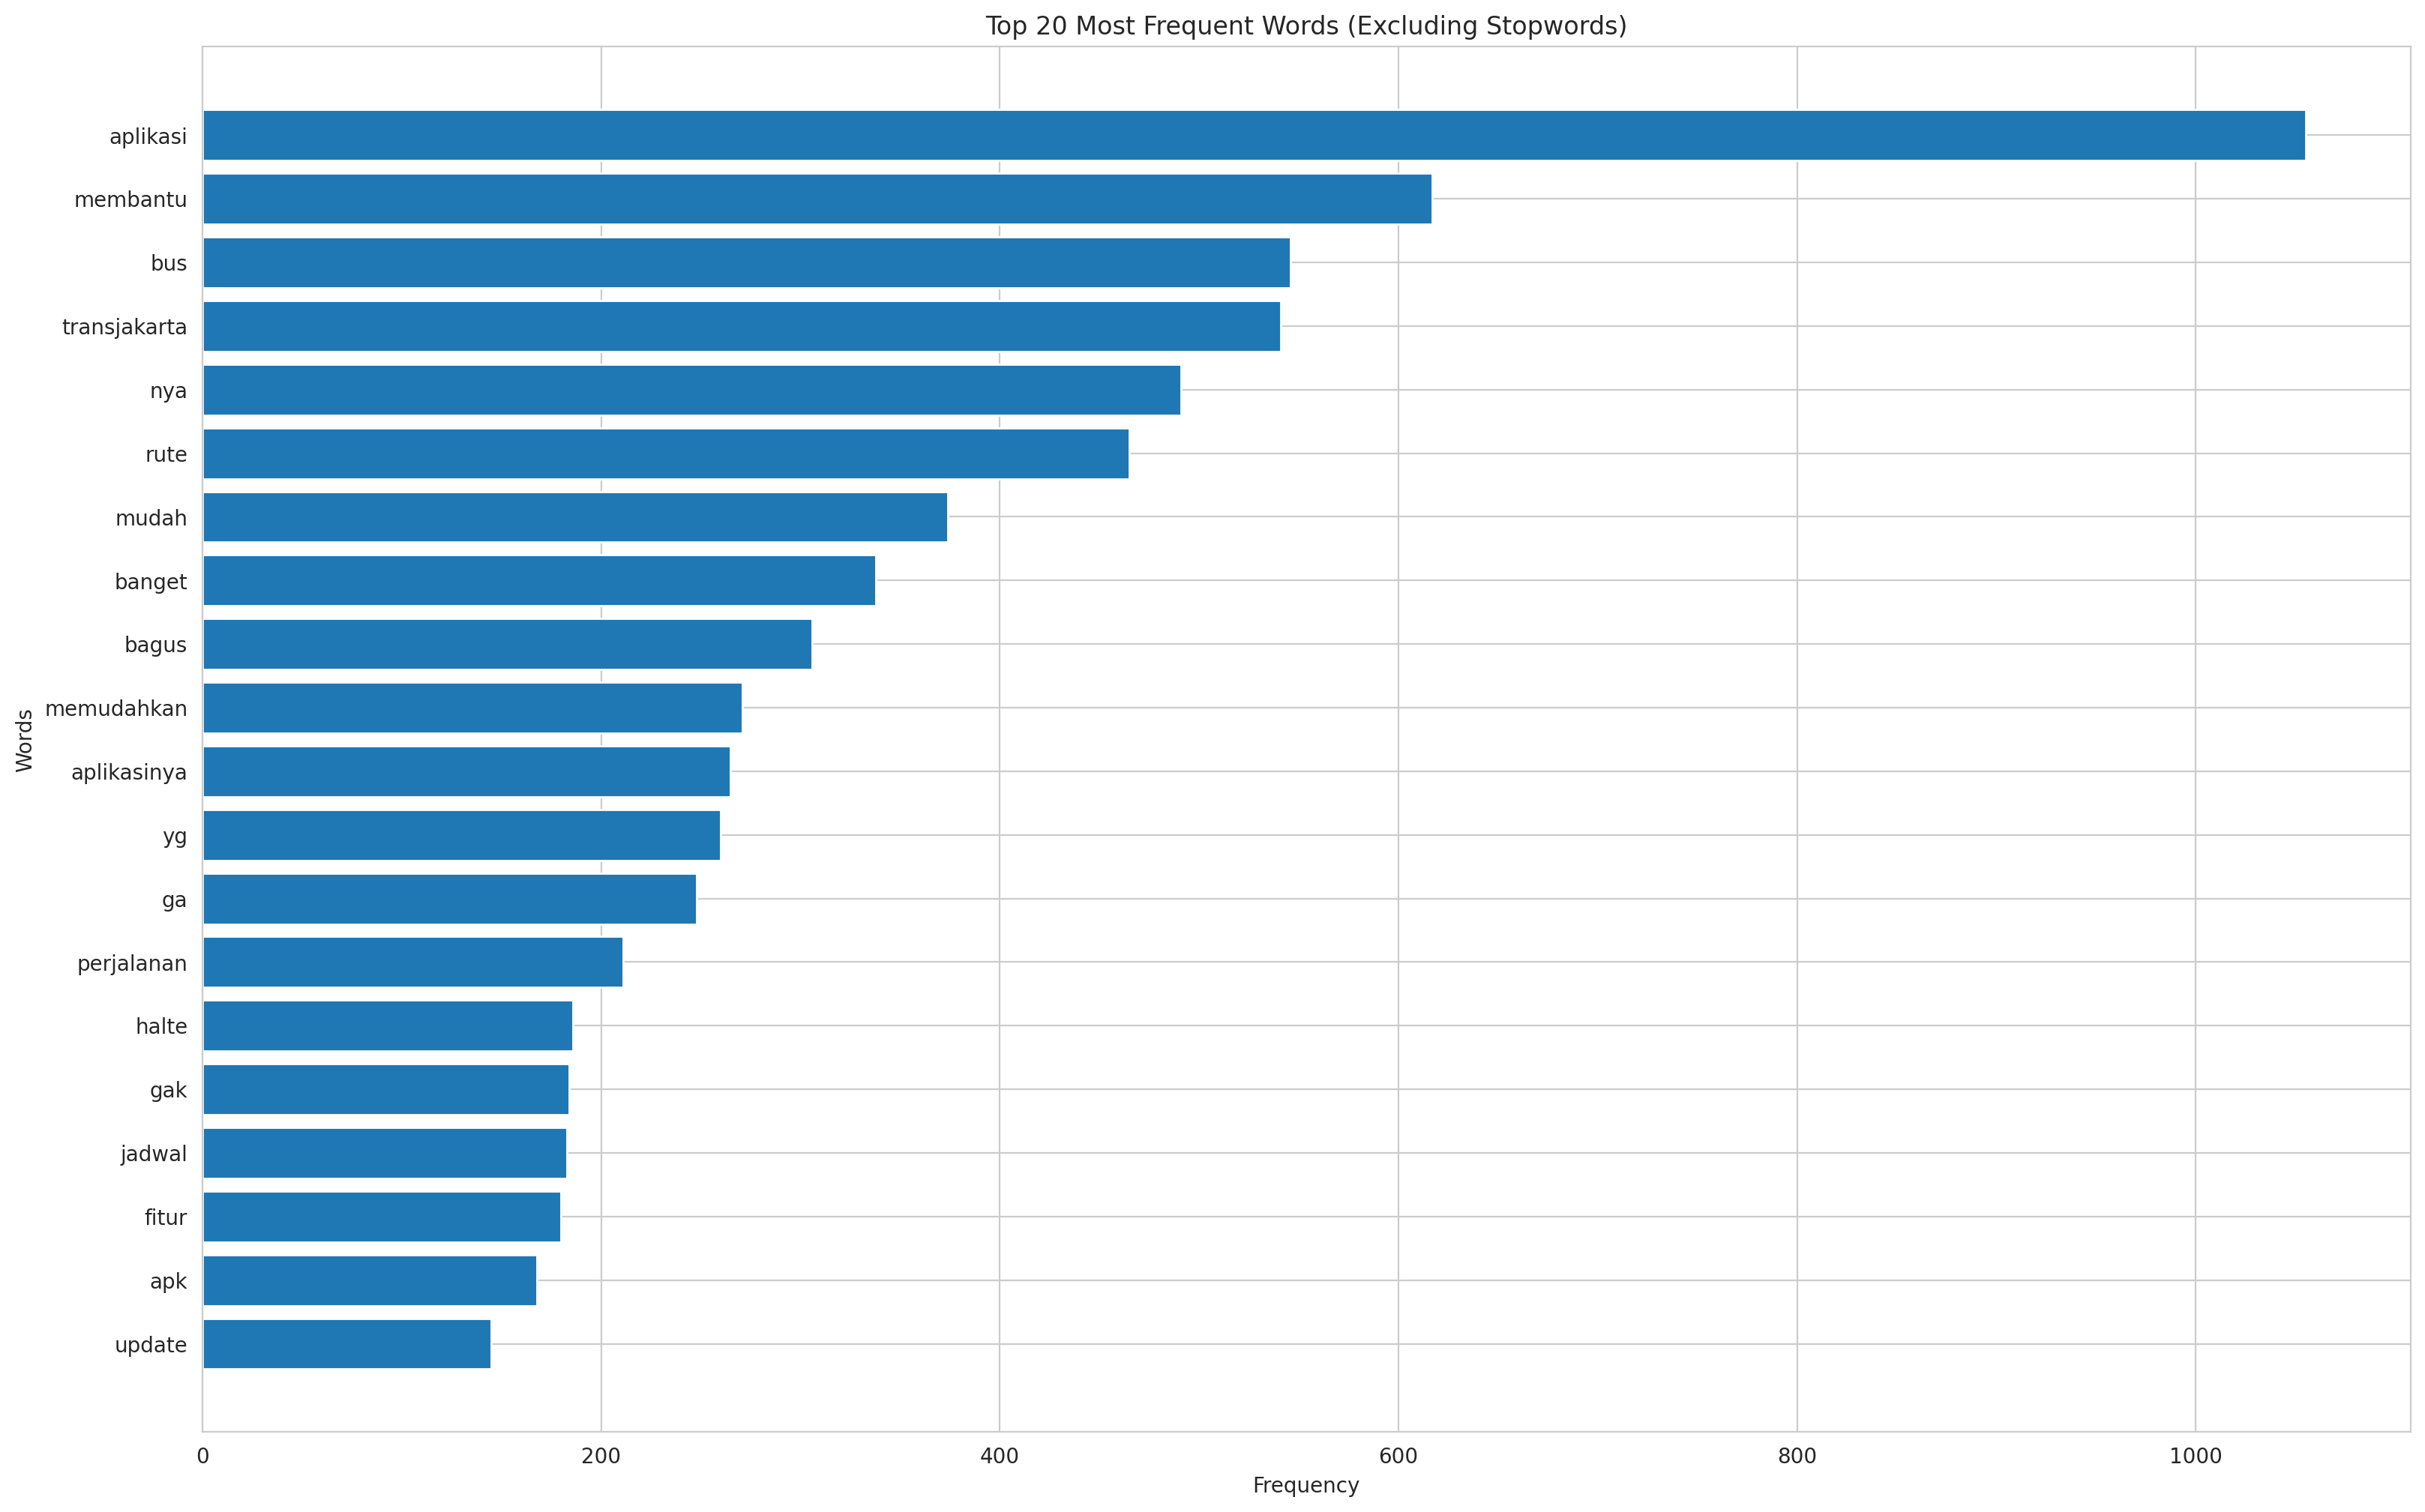

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_tj[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.show()

In [15]:
common_words

[('aplikasi', 1055),
 ('membantu', 617),
 ('bus', 546),
 ('transjakarta', 541),
 ('nya', 491),
 ('rute', 465),
 ('mudah', 374),
 ('banget', 338),
 ('bagus', 306),
 ('memudahkan', 271),
 ('aplikasinya', 265),
 ('yg', 260),
 ('ga', 248),
 ('perjalanan', 211),
 ('halte', 186),
 ('gak', 184),
 ('jadwal', 183),
 ('fitur', 180),
 ('apk', 168),
 ('update', 145)]

Custom Stopwords

In [16]:
# Tambah custom stopwords
custom_stopwords = ["good", "nya", "banget", "yg", "ga", "gak", "apk", "update", "gk", "mna", "kmna", "jdi"]

# Pastikan indonesian_stopwords juga merupakan sebuah list atau set
# Asumsi indonesian_stopwords sudah ada dan berbentuk list
# indonesian_stopwords = [...]

# 2. Gabungkan stopwords bawaan dan custom stopwords
# --- PERBAIKAN DI SINI ---
# Ubah list menjadi set agar bisa menggunakan metode .union()
all_stopwords = set(indonesian_stopwords).union(custom_stopwords)

# --- Alternatif lain yang lebih singkat ---
# all_stopwords = set(indonesian_stopwords + custom_stopwords)


def remove_stopwords(tokens):
    return [token for token in tokens if token not in all_stopwords]

df_tj['removed_stopwords_content'] = df_tj['lower_tokenized_content'].apply(remove_stopwords)
df_tj[['lower_tokenized_content', 'removed_stopwords_content']]

print("Updated stopwords:", all_stopwords)

Updated stopwords: {'kira', 'berujar', 'digunakan', 'berupa', 'keseluruhan', 'toh', 'memisalkan', 'yakni', 'dialah', 'biasanya', 'sinilah', 'cara', 'jikalau', 'siap', 'ibu', 'diucapkannya', 'terbanyak', 'tunjuk', 'bagai', 'menyiapkan', 'sebaliknya', 'tuturnya', 'selama-lamanya', 'diibaratkannya', 'mana', 'kapankah', 'menandaskan', 'segalanya', 'sejumlah', 'sering', 'diperlukannya', 'dimulai', 'ingat-ingat', 'padahal', 'dimungkinkan', 'empat', 'usah', 'bersiap-siap', 'umumnya', 'terhadap', 'tersebut', 'jangan', 'olehnya', 'sini', 'dikatakannya', 'diakhiri', 'kebetulan', 'lima', 'gunakan', 'kenapa', 'menantikan', 'meminta', 'akankah', 'begitupun', 'merasa', 'sementara', 'kecil', 'hanyalah', 'semisal', 'bersama-sama', 'terlebih', 'yg', 'besar', 'perlukah', 'sepantasnyalah', 'kedua', 'hingga', 'inikah', 'pihaknya', 'berawal', 'betul', 'mampukah', 'sekadarnya', 'artinya', 'inginkah', 'beginikah', 'memperbuat', 'sesudah', 'jawabnya', 'sebut', 'tiga', 'kita', 'untuk', 'memerlukan', 'disini', 

In [17]:
print(df_tj['lower_tokenized_content'][500])
print(df_tj['removed_stopwords_content'][500])

['terimaksih', 'yg', 'sudah', 'menciptakan', 'aplikasi', 'ini', ',', 'kmna', 'mna', 'jdi', 'lebih', 'gampang', 'buat', 'yg', 'gk', 'ada', 'kendaraan', ',', 'tranformasi', 'nya', 'juga', 'cepet', 'gak', 'lelet', 'fitur', 'fitur', 'di', 'aplikasi', 'ini', 'juga', 'mudah', 'dimengerti', 'dan', 'banyak']
['terimaksih', 'menciptakan', 'aplikasi', ',', 'gampang', 'kendaraan', ',', 'tranformasi', 'cepet', 'lelet', 'fitur', 'fitur', 'aplikasi', 'mudah', 'dimengerti']


## Lemmatization

In [18]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.9 MB/s eta 0:00:00


In [19]:
# Import the Sastrawi StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create the factory and the stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lemmatize_text_indonesian(tokens):
    # Sastrawi's stemmer works on a single string, so we stem each token individually
    # This is a simple approach; for efficiency on large datasets, other methods might be better
    lemmatized_tokens = [stemmer.stem(token) for token in tokens]
    return lemmatized_tokens

# Apply the correct Indonesian lemmatization function to your DataFrame
df_tj['lemmatized_content'] = df_tj['removed_stopwords_content'].apply(lemmatize_text_indonesian)



In [20]:
# Display the result
df_tj[['removed_stopwords_content', 'lemmatized_content']]

removed_stopwords_content  \
0     [udah, sempurna, ,, ditingkatkan, ngehubungin,...   
1     [kesalahan, ,, versi, pembaruan, ,, tolong, pe...   
2                                                  [ok]   
3     [tolong, gate, scan, perbaiki, bikin, mudah, ,...   
4     [aplikasi, memasukan, kode, otp, peringatan, e...   
...                                                 ...   
2741                                          [mantaps]   
2742                             [crash, pilih, profil]   
2743  [aplikasi, kocag, ,, becus, bikin, aplikasi, ,...   
2744  [aplikasi, ,, server, eror, ,, loading, ,, pen...   
2745                                             [wihh]   

                                     lemmatized_content  
0     [udah, sempurna, , tingkat, ngehubungin, data,...  
1                [salah, , versi, baru, , tolong, baik]  
2                                                  [ok]  
3     [tolong, gate, scan, baik, bikin, mudah, , kad...  
4              [aplikasi, pasu, kode, otp, ingat, eror]  
...                                                 ...  
2741                                          [mantaps]  
2742                             [crash, pilih, profil]  
2743  [aplikasi, kocag, , becus, bikin, aplikasi, , ...  
2744  [aplikasi, , server, eror, , loading, , cari, ...  
2745                                             [wihh]  

[2746 rows x 2 columns]

In [21]:
print(df_tj['removed_stopwords_content'][10])
print(df_tj['lemmatized_content'][10])

['berulang', 'daftar', 'email', '..', 'kenpa', '...', 'mohon', 'diperbaiki', 'kembali🙏🏻']
['ulang', 'daftar', 'email', '', 'kenpa', '', 'mohon', 'baik', 'kembali']


## Stemming

In [22]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt')

stemmer = PorterStemmer()

def stem_text(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df_tj['stemmed_content'] = df_tj['lemmatized_content'].apply(stem_text)
df_tj[['lemmatized_content', 'stemmed_content']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


lemmatized_content  \
0     [udah, sempurna, , tingkat, ngehubungin, data,...   
1                [salah, , versi, baru, , tolong, baik]   
2                                                  [ok]   
3     [tolong, gate, scan, baik, bikin, mudah, , kad...   
4              [aplikasi, pasu, kode, otp, ingat, eror]   
...                                                 ...   
2741                                          [mantaps]   
2742                             [crash, pilih, profil]   
2743  [aplikasi, kocag, , becus, bikin, aplikasi, , ...   
2744  [aplikasi, , server, eror, , loading, , cari, ...   
2745                                             [wihh]   

                                        stemmed_content  
0     [udah, sempurna, , tingkat, ngehubungin, data,...  
1                [salah, , versi, baru, , tolong, baik]  
2                                                  [ok]  
3     [tolong, gate, scan, baik, bikin, mudah, , kad...  
4              [aplikasi, pasu, kode, otp, ingat, eror]  
...                                                 ...  
2741                                           [mantap]  
2742                             [crash, pilih, profil]  
2743  [aplikasi, kocag, , becu, bikin, aplikasi, , m...  
2744  [aplikasi, , server, eror, , load, , cari, rut...  
2745                                             [wihh]  

[2746 rows x 2 columns]

In [23]:
print(df_tj['lemmatized_content'][2744])
print(df_tj['stemmed_content'][2744])

['aplikasi', '', 'server', 'eror', '', 'loading', '', 'cari', 'rute', 'susah', '', 'posisi', 'bus', 'kacau', '', 'ui', 'tarik', '', 'niat', 'tj', 'kaya', 'gin', '']
['aplikasi', '', 'server', 'eror', '', 'load', '', 'cari', 'rute', 'susah', '', 'posisi', 'bu', 'kacau', '', 'ui', 'tarik', '', 'niat', 'tj', 'kaya', 'gin', '']


## Punctuation Removal

In [24]:
import string

def remove_punctuation(text):
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        cleaned_text = text.translate(translator)
        return cleaned_text
    else:
        return text

df_tj['stemmed_content'] = df_tj['stemmed_content'].astype(str)
df_tj['cleaned_content'] = df_tj['stemmed_content'].apply(remove_punctuation)
df_tj[['stemmed_content', 'cleaned_content']]

stemmed_content  \
0     ['udah', 'sempurna', '', 'tingkat', 'ngehubung...   
1     ['salah', '', 'versi', 'baru', '', 'tolong', '...   
2                                                ['ok']   
3     ['tolong', 'gate', 'scan', 'baik', 'bikin', 'm...   
4     ['aplikasi', 'pasu', 'kode', 'otp', 'ingat', '...   
...                                                 ...   
2741                                         ['mantap']   
2742                       ['crash', 'pilih', 'profil']   
2743  ['aplikasi', 'kocag', '', 'becu', 'bikin', 'ap...   
2744  ['aplikasi', '', 'server', 'eror', '', 'load',...   
2745                                           ['wihh']   

                                        cleaned_content  
0     udah sempurna  tingkat ngehubungin data bu kar...  
1                        salah  versi baru  tolong baik  
2                                                    ok  
3     tolong gate scan baik bikin mudah  kadang kada...  
4                     aplikasi pasu kode otp ingat eror  
...                                                 ...  
2741                                             mantap  
2742                                 crash pilih profil  
2743  aplikasi kocag  becu bikin aplikasi  masuk ker...  
2744  aplikasi  server eror  load  cari rute susah  ...  
2745                                               wihh  

[2746 rows x 2 columns]

##Common Word

In [25]:
import nltk
import string
# Mengimpor stopwords Bahasa Indonesia
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# --- Download Resource yang Diperlukan ---
# 'stopwords' untuk daftar kata umum (yang, di, ke, dari)
# 'punkt' untuk tokenisasi (memecah kalimat menjadi kata)
nltk.download('stopwords')
nltk.download('punkt')

# --- 1. Definisikan 'all_stopwords' menggunakan Bahasa Indonesia ---
# Mengambil daftar stopwords Bahasa Indonesia
# Pastikan Anda sudah menjalankan nltk.download('stopwords')
stop_words_indonesian = set(stopwords.words('indonesian'))
punctuation = set(string.punctuation)
all_stopwords = stop_words_indonesian.union(punctuation)

# --- 2. Fungsi yang Disederhanakan untuk Bahasa Indonesia ---
# Bagian Part-of-Speech (POS) tagging dihapus karena modelnya untuk Bahasa Inggris
def remove_stopwords_indonesian(text):
    # Memastikan input adalah string
    if not isinstance(text, str):
        return "" # Mengembalikan string kosong jika input bukan teks

    # Menggunakan word_tokenize untuk hasil yang lebih baik
    tokens = word_tokenize(text.lower()) # Mengubah teks menjadi huruf kecil

    filtered_tokens = []
    for token in tokens:
        # Simpan token jika bukan stopword dan bukan tanda baca
        if token not in all_stopwords:
            filtered_tokens.append(token)

    return " ".join(filtered_tokens)

df_tj['cleaned_content_no_common'] =df_tj['cleaned_content'].apply(remove_stopwords_indonesian)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
df_tj

reviewId         userName  \
0     01a956bc-8356-4eec-8bd6-85644d311be0  Pengguna Google   
1     234b7bb0-8ce0-498a-9644-088811e7a521  Pengguna Google   
2     06a6c78b-8a8d-4395-9ab7-7ecdd405e7f9  Pengguna Google   
3     9ec5f40b-63e5-46d3-a9cf-85f8aa8bda29  Pengguna Google   
4     3f1c44b5-aef1-4228-aaa2-d647488808c4  Pengguna Google   
...                                    ...              ...   
2741  cdd9f5f2-b4cb-44c2-814e-860e0688f3d5  Pengguna Google   
2742  66859930-33cc-484a-9c0a-f25534958578  Pengguna Google   
2743  eb386bcd-d074-448e-b636-8f8b4d20ecb1  Pengguna Google   
2744  43b40878-dcff-44b8-bed5-2dfb89bc0880  Pengguna Google   
2745  af86170d-586d-4c48-9963-e45418088147  Pengguna Google   

                                              userImage  \
0     https://play-lh.googleusercontent.com/EGemoI2N...   
1     https://play-lh.googleusercontent.com/EGemoI2N...   
2     https://play-lh.googleusercontent.com/EGemoI2N...   
3     https://play-lh.googleusercontent.com/EGemoI2N...   
4     https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                 ...   
2741  https://play-lh.googleusercontent.com/EGemoI2N...   
2742  https://play-lh.googleusercontent.com/EGemoI2N...   
2743  https://play-lh.googleusercontent.com/EGemoI2N...   
2744  https://play-lh.googleusercontent.com/EGemoI2N...   
2745  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                content  score  thumbsUpCount  \
0     Udah hampir sempurna ini, mungkin bisa ditingk...      5              0   
1     kesalahan yang sering terjadi, versi yang lebi...      4              0   
2                                                    ok      5              0   
3     Tolong Gate scan nya Di perbaiki dan di bikin ...      5              0   
4     aplikasi tidak bisa memasukan kode otp selalu ...      3              0   
...                                                 ...    ...            ...   
2741                                            Mantaps      5              5   
2742              Sudah enggak crash kalau pilih profil      5              7   
2743  Aplikasi kocag, gk becus bikin aplikasi, masuk...      1              7   
2744  Aplikasi gak jelas, server eror, loading lama,...      1             23   
2745                                               wihh      5              2   

     reviewCreatedVersion                   at  \
0                   2.7.1  2025-09-06 12:30:06   
1                   2.7.1  2025-09-06 11:03:16   
2                   2.7.1  2025-09-06 04:19:05   
3                   2.7.1  2025-09-06 01:45:32   
4                     NaN  2025-09-05 17:19:45   
...                   ...                  ...   
2741                  1.4  2024-05-16 11:10:02   
2742                  1.8  2024-05-16 04:52:59   
2743                  1.4  2024-05-12 09:42:40   
2744                  1.4  2024-05-11 13:43:39   
2745                  NaN  2024-05-07 09:26:49   

                                           replyContent            repliedAt  \
0                                                   NaN                  NaN   
1                                                   NaN                  NaN   
2                                                   NaN                  NaN   
3                                                   NaN                  NaN   
4                                                   NaN                  NaN   
...                                                 ...                  ...   
2741                                                NaN                  NaN   
2742                                                NaN                  NaN   
2743                                                NaN                  NaN   
2744  Halo Teguh Aliansyah,\nTerima kasih untuk masu...  2024-05-23 06:29:46   
2745                                                NaN                  NaN   

     appVersion                  

In [27]:
from collections import Counter

# Function to get word counts from a list of strings
def get_word_counts(text_list):
    all_words = ' '.join(text_list).split()
    return Counter(all_words)

# Get word counts for both columns
word_counts_cleaned = get_word_counts(df_tj['cleaned_content'])
word_counts_no_common = get_word_counts(df_tj['cleaned_content_no_common'])

# Find words present in cleaned_content but not in cleaned_content_no_common
words_only_in_cleaned = set(word_counts_cleaned.keys()) - set(word_counts_no_common.keys())

# Find words present in cleaned_content_no_common but not in cleaned_content
words_only_in_no_common = set(word_counts_no_common.keys()) - set(word_counts_cleaned.keys())

print("Words present only in 'cleaned_content':")
print(words_only_in_cleaned)

print("\nWords present only in 'cleaned_content_no_common':")
print(words_only_in_no_common)

# You can also compare the total number of unique words
print(f"\nTotal unique words in 'cleaned_content': {len(word_counts_cleaned)}")
print(f"Total unique words in 'cleaned_content_no_common': {len(word_counts_no_common)}")

Words present only in 'cleaned_content':
{'perlu', 'kira', 'tengah', 'dan', 'jadi', 'siap', 'ibu', 'pak', 'tunjuk', 'bagi', 'beberapa', 'nanti', 'mana', 'baik', 'baru', 'depan', 'dapat', 'hanya', 'maka', 'selain', 'tiba', 'mau', 'datang', 'rata', 'saya', 'sekitar', 'kalau', 'sendiri', 'kini', 'betul', 'pada', 'sampai', 'balik', 'ada', 'tambah', 'tiga', 'kita', 'untuk', 'dengan', 'lanjut', 'bulan', 'tahu', 'kembali', 'masalah', 'walaupun', 'kami', 'lewat', 'wah', 'banyak', 'hari', 'kurang', 'lebih', 'serta', 'bisa', 'dua', 'kala', 'sekali', 'guna', 'dalam', 'keluar', 'naik', 'tentu', 'terus', 'buat', 'dekat', 'sangat', 'waktu', 'tempat', 'rasa', 'aku', 'ke', 'ingat', 'luar', 'benar', 'punya', 'malah', 'sana', 'selalu', 'diri', 'seluruh', 'apa', 'ini', 'demikian', 'di', 'apalagi', 'pasti', 'bawah', 'tanya', 'biasa', 'lagi', 'pun', 'lalu', 'ingin', 'lama', 'ikut', 'tepat', 'mula', 'mampu', 'turut', 'saat'}

Words present only in 'cleaned_content_no_common':
set()

Total unique words in 'c

##Sentiment Analysis

In [28]:
from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_tj['sentiment_polarity'] = df_tj['stemmed_content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_tj['sentiment_subjective'] = df_tj['stemmed_content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)


In [29]:
df_tj['sentiment_rating'] = df_tj['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [30]:
df_tj.loc[:,["cleaned_content_no_common","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

cleaned_content_no_common  score  \
0     udah sempurna tingkat ngehubungin data bu karn...      5   
1                                    salah versi tolong      4   
2                                                    ok      5   
3     tolong gate scan bikin mudah kadang kadang ngg...      5   
4                           aplikasi pasu kode otp eror      3   
...                                                 ...    ...   
2741                                             mantap      5   
2742                                 crash pilih profil      5   
2743  aplikasi kocag becu bikin aplikasi masuk kerja...      1   
2744  aplikasi server eror load cari rute susah posi...      1   
2745                                               wihh      5   

      sentiment_polarity  sentiment_subjective sentiment_rating  
0                    0.0                   0.0         Positive  
1                    0.0                   0.0         Positive  
2                    0.5                   0.5         Positive  
3                    0.0                   0.0         Positive  
4                    0.0                   0.0          Neutral  
...                  ...                   ...              ...  
2741                 0.0                   0.0         Positive  
2742                 0.0                   0.0         Positive  
2743                -0.4                   0.4         Negative  
2744                 0.0                   0.0         Negative  
2745                 0.0                   0.0         Positive  

[2746 rows x 5 columns]

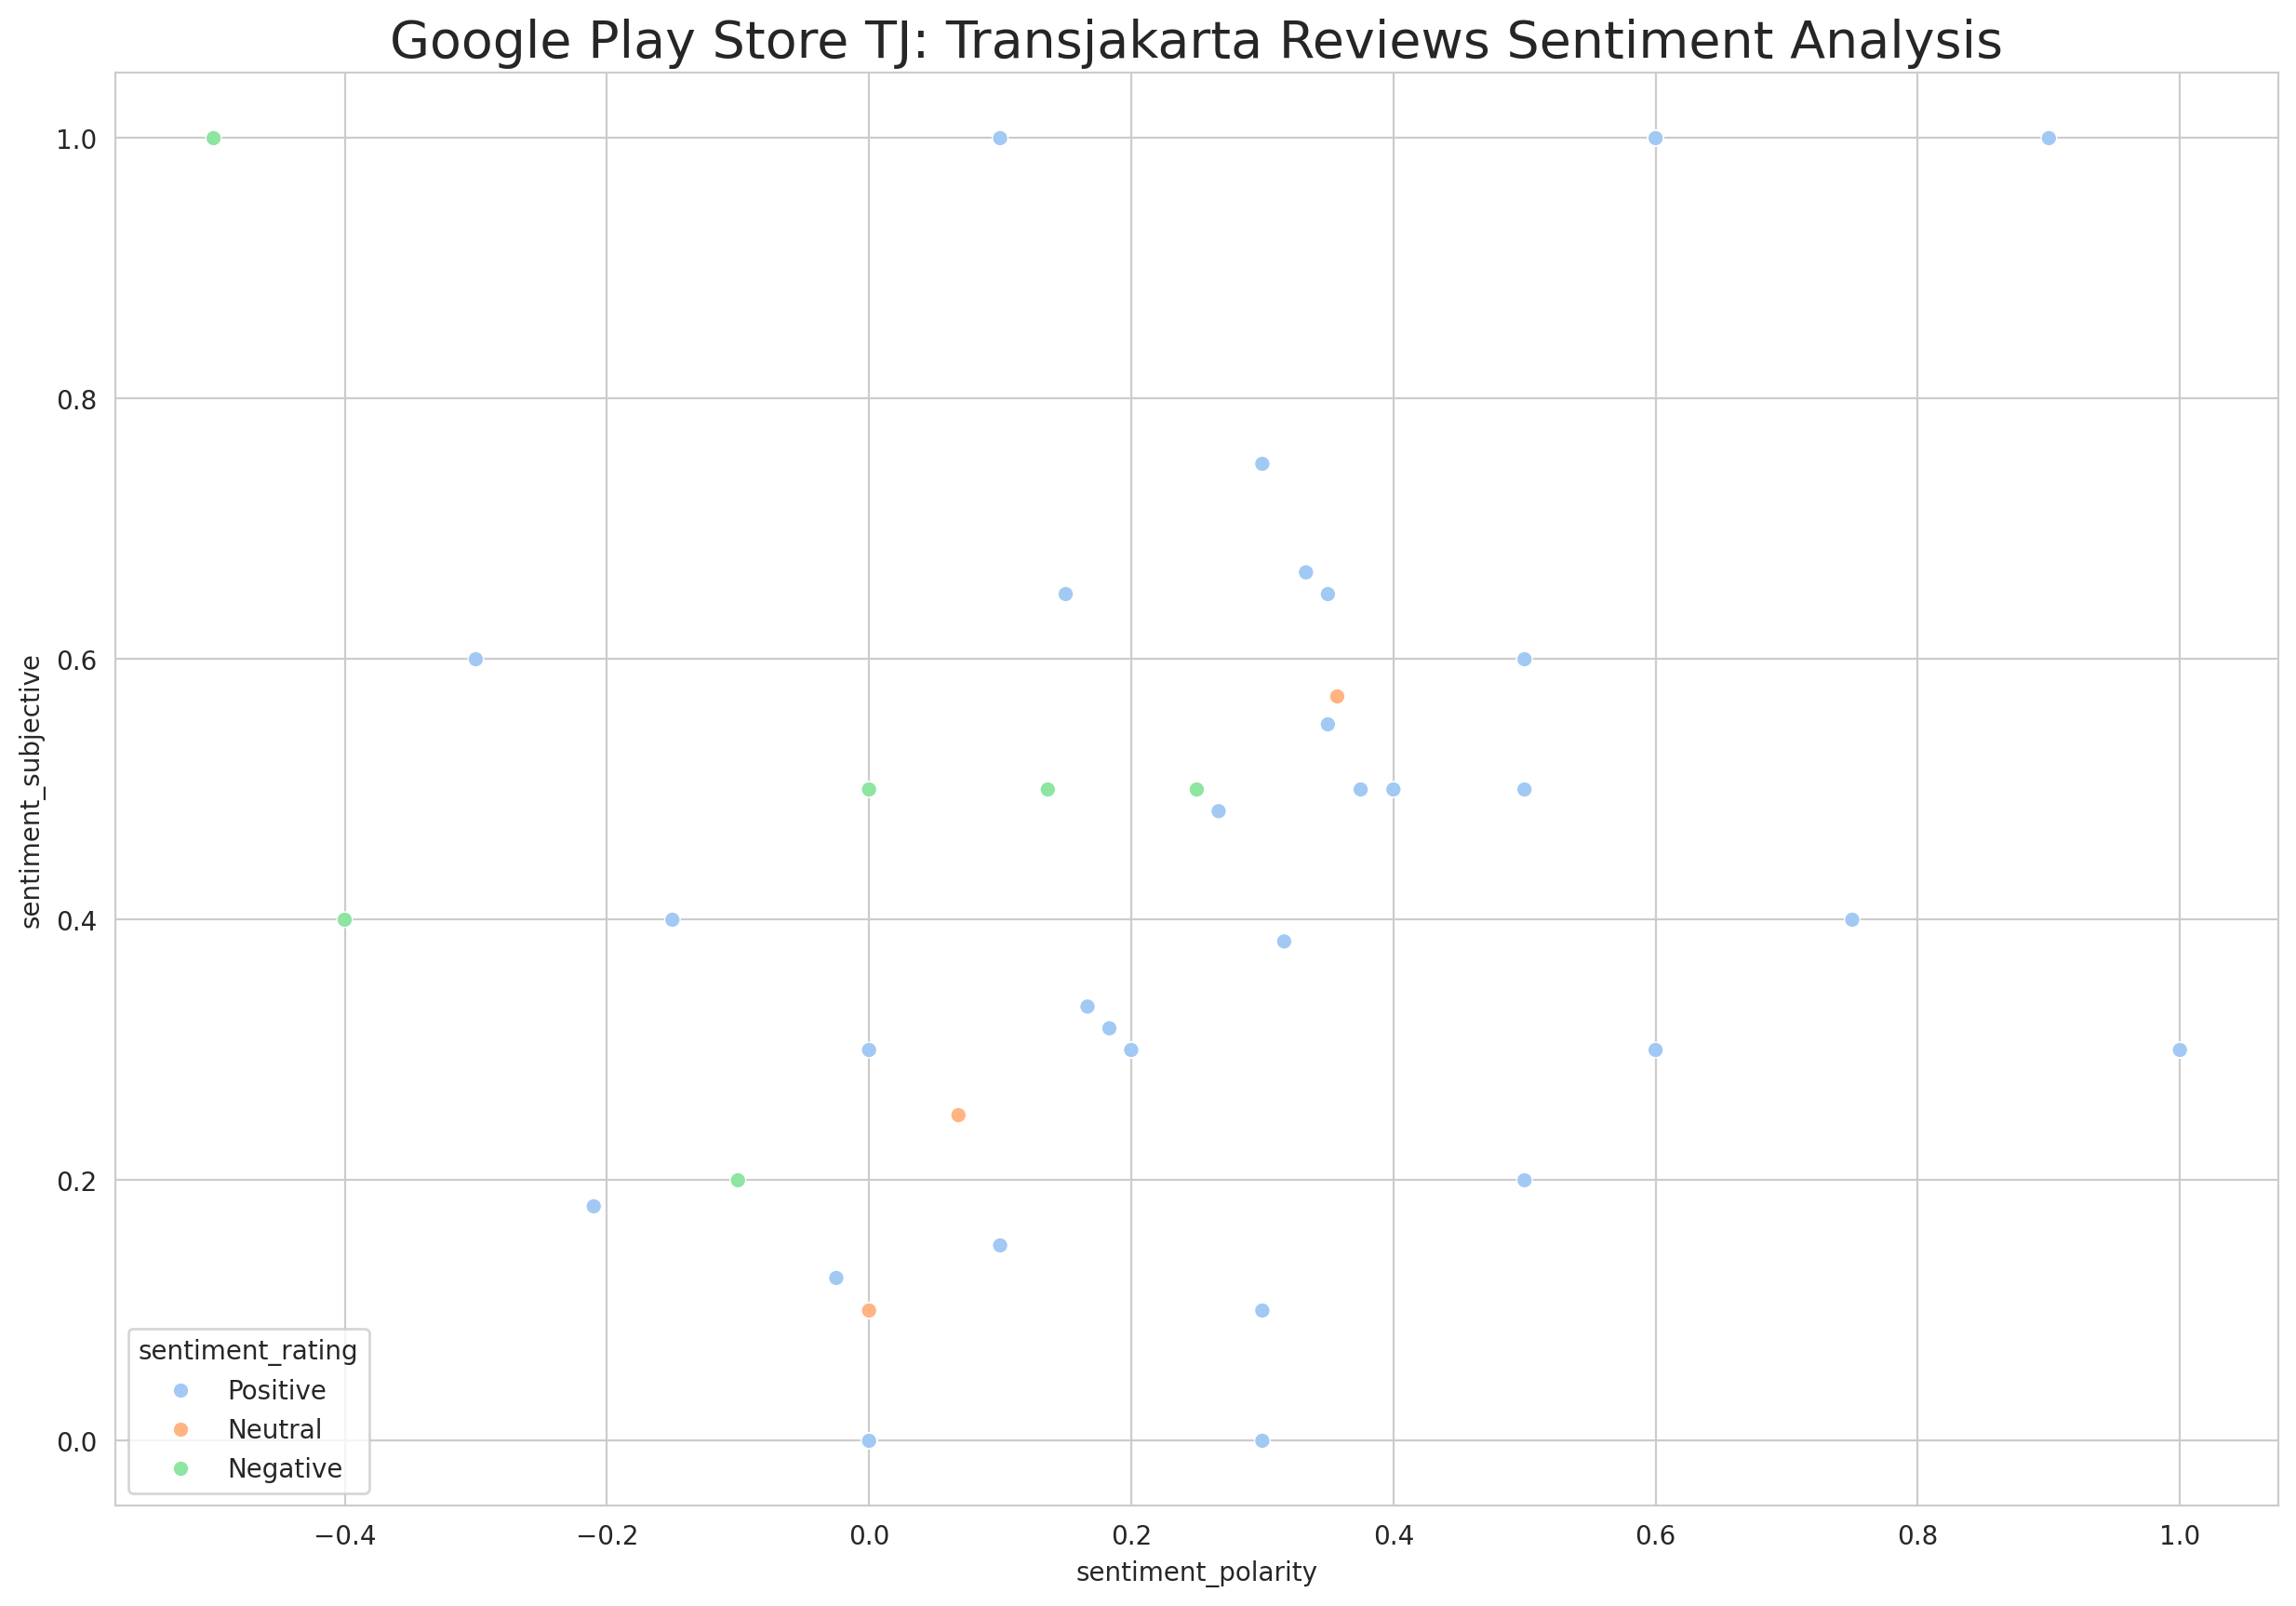

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_tj['sentiment_polarity'], y=df_tj['sentiment_subjective'],
                hue=df_tj['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store TJ: Transjakarta Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [34]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


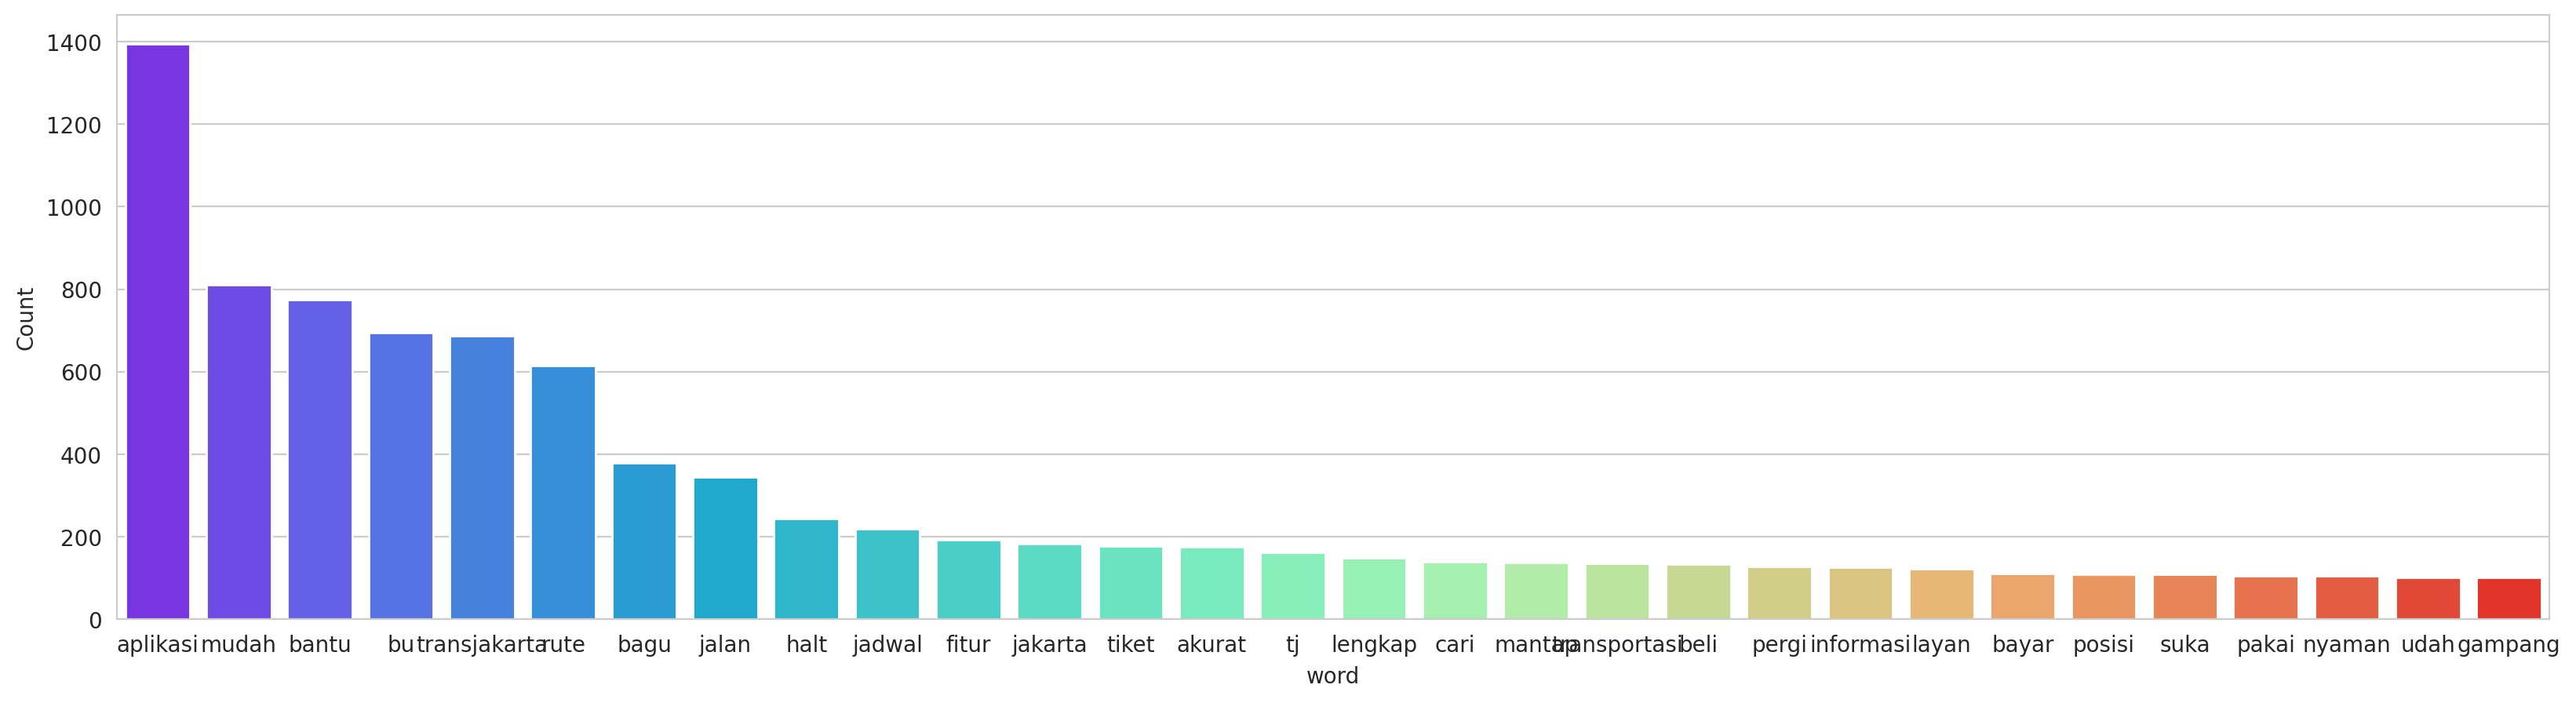

In [36]:
freq_words(df_tj['cleaned_content_no_common'])

In [37]:
df_tj.loc[:,["cleaned_content_no_common","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

cleaned_content_no_common  score  thumbsUpCount  \
0     udah sempurna tingkat ngehubungin data bu karn...      5              0   
1                                    salah versi tolong      4              0   
2                                                    ok      5              0   
3     tolong gate scan bikin mudah kadang kadang ngg...      5              0   
4                           aplikasi pasu kode otp eror      3              0   
...                                                 ...    ...            ...   
2741                                             mantap      5              5   
2742                                 crash pilih profil      5              7   
2743  aplikasi kocag becu bikin aplikasi masuk kerja...      1              7   
2744  aplikasi server eror load cari rute susah posi...      1             23   
2745                                               wihh      5              2   

     reviewCreatedVersion                   at  \
0                   2.7.1  2025-09-06 12:30:06   
1                   2.7.1  2025-09-06 11:03:16   
2                   2.7.1  2025-09-06 04:19:05   
3                   2.7.1  2025-09-06 01:45:32   
4                     NaN  2025-09-05 17:19:45   
...                   ...                  ...   
2741                  1.4  2024-05-16 11:10:02   
2742                  1.8  2024-05-16 04:52:59   
2743                  1.4  2024-05-12 09:42:40   
2744                  1.4  2024-05-11 13:43:39   
2745                  NaN  2024-05-07 09:26:49   

                                           replyContent            repliedAt  
0                                                   NaN                  NaN  
1                                                   NaN                  NaN  
2                                                   NaN                  NaN  
3                                                   NaN                  NaN  
4                                                   NaN                  NaN  
...                                                 ...                  ...  
2741                                                NaN                  NaN  
2742                                                NaN                  NaN  
2743                                                NaN                  NaN  
2744  Halo Teguh Aliansyah,\nTerima kasih untuk masu...  2024-05-23 06:29:46  
2745                                                NaN                  NaN  

[2746 rows x 7 columns]

In [38]:
df_tj['score'].value_counts()

score
5    2071
1     421
3      98
2      87
4      69
Name: count, dtype: int64

In [39]:
df_tj

reviewId         userName  \
0     01a956bc-8356-4eec-8bd6-85644d311be0  Pengguna Google   
1     234b7bb0-8ce0-498a-9644-088811e7a521  Pengguna Google   
2     06a6c78b-8a8d-4395-9ab7-7ecdd405e7f9  Pengguna Google   
3     9ec5f40b-63e5-46d3-a9cf-85f8aa8bda29  Pengguna Google   
4     3f1c44b5-aef1-4228-aaa2-d647488808c4  Pengguna Google   
...                                    ...              ...   
2741  cdd9f5f2-b4cb-44c2-814e-860e0688f3d5  Pengguna Google   
2742  66859930-33cc-484a-9c0a-f25534958578  Pengguna Google   
2743  eb386bcd-d074-448e-b636-8f8b4d20ecb1  Pengguna Google   
2744  43b40878-dcff-44b8-bed5-2dfb89bc0880  Pengguna Google   
2745  af86170d-586d-4c48-9963-e45418088147  Pengguna Google   

                                              userImage  \
0     https://play-lh.googleusercontent.com/EGemoI2N...   
1     https://play-lh.googleusercontent.com/EGemoI2N...   
2     https://play-lh.googleusercontent.com/EGemoI2N...   
3     https://play-lh.googleusercontent.com/EGemoI2N...   
4     https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                 ...   
2741  https://play-lh.googleusercontent.com/EGemoI2N...   
2742  https://play-lh.googleusercontent.com/EGemoI2N...   
2743  https://play-lh.googleusercontent.com/EGemoI2N...   
2744  https://play-lh.googleusercontent.com/EGemoI2N...   
2745  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                content  score  thumbsUpCount  \
0     Udah hampir sempurna ini, mungkin bisa ditingk...      5              0   
1     kesalahan yang sering terjadi, versi yang lebi...      4              0   
2                                                    ok      5              0   
3     Tolong Gate scan nya Di perbaiki dan di bikin ...      5              0   
4     aplikasi tidak bisa memasukan kode otp selalu ...      3              0   
...                                                 ...    ...            ...   
2741                                            Mantaps      5              5   
2742              Sudah enggak crash kalau pilih profil      5              7   
2743  Aplikasi kocag, gk becus bikin aplikasi, masuk...      1              7   
2744  Aplikasi gak jelas, server eror, loading lama,...      1             23   
2745                                               wihh      5              2   

     reviewCreatedVersion                   at  \
0                   2.7.1  2025-09-06 12:30:06   
1                   2.7.1  2025-09-06 11:03:16   
2                   2.7.1  2025-09-06 04:19:05   
3                   2.7.1  2025-09-06 01:45:32   
4                     NaN  2025-09-05 17:19:45   
...                   ...                  ...   
2741                  1.4  2024-05-16 11:10:02   
2742                  1.8  2024-05-16 04:52:59   
2743                  1.4  2024-05-12 09:42:40   
2744                  1.4  2024-05-11 13:43:39   
2745                  NaN  2024-05-07 09:26:49   

                                           replyContent            repliedAt  \
0                                                   NaN                  NaN   
1                                                   NaN                  NaN   
2                                                   NaN                  NaN   
3                                                   NaN                  NaN   
4                                                   NaN                  NaN   
...                                                 ...                  ...   
2741                                                NaN                  NaN   
2742                                                NaN                  NaN   
2743                                                NaN                  NaN   
2744  Halo Teguh Aliansyah,\nTerima kasih untuk masu...  2024-05-23 06:29:46   
2745                                                NaN                  NaN   

      ...                        

## EDA

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# import pandas_profiling as pp
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [42]:
df_tj.sample(5)

reviewId         userName  \
759   e5dd85ae-c05d-4e3e-8546-1463cdcb30c6  Pengguna Google   
257   3582055d-7285-44ec-851b-5462c08e664c  Pengguna Google   
391   957501fc-3cc8-4c95-80bb-f11bb1b03e00  Pengguna Google   
1510  7c8948a1-b3e5-4a3b-b78c-87ab16eea805  Pengguna Google   
1520  40d183c7-390d-43ae-93a0-33b7b9c05f3f  Pengguna Google   

                                              userImage  \
759   https://play-lh.googleusercontent.com/EGemoI2N...   
257   https://play-lh.googleusercontent.com/EGemoI2N...   
391   https://play-lh.googleusercontent.com/EGemoI2N...   
1510  https://play-lh.googleusercontent.com/EGemoI2N...   
1520  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                content  score  thumbsUpCount  \
759                                         error terus      1              0   
257   Alhamdulillah Terimakasih Apl Tj sangat memban...      5              0   
391   Aplikasi sangat berguna sekali, karena membant...      5              0   
1510  ga bakal nyesel si pake aplikasi ini karena me...      5              0   
1520  Aplksi sngt bagus, tidak pusing melihat rute² ...      5              0   

     reviewCreatedVersion                   at replyContent repliedAt  ...  \
759                 2.4.0  2025-05-14 13:36:11          NaN       NaN  ...   
257                 2.5.1  2025-07-21 14:09:43          NaN       NaN  ...   
391                 2.5.0  2025-06-29 10:21:27          NaN       NaN  ...   
1510                2.1.5  2024-12-02 07:25:02          NaN       NaN  ...   
1520                2.1.5  2024-11-30 03:06:57          NaN       NaN  ...   

                                      tokenized_content  \
759                                      [error, terus]   
257   [Alhamdulillah, Terimakasih, Apl, Tj, sangat, ...   
391   [Aplikasi, sangat, berguna, sekali, ,, karena,...   
1510  [ga, bakal, nyesel, si, pake, aplikasi, ini, k...   
1520  [Aplksi, sngt, bagus, ,, tidak, pusing, meliha...   

                                lower_tokenized_content  \
759                                      [error, terus]   
257   [alhamdulillah, terimakasih, apl, tj, sangat, ...   
391   [aplikasi, sangat, berguna, sekali, ,, karena,...   
1510  [ga, bakal, nyesel, si, pake, aplikasi, ini, k...   
1520  [aplksi, sngt, bagus, ,, tidak, pusing, meliha...   

                              removed_stopwords_content  \
759                                             [error]   
257   [alhamdulillah, terimakasih, apl, tj, membantu...   
391   [aplikasi, berguna, ,, membantu, memberitahuka...   
1510  [nyesel, si, pake, aplikasi, berguna, woii, ap...   
1520  [aplksi, sngt, bagus, ,, pusing, rute², jalan,...   

                                     lemmatized_content  \
759                                             [error]   
257   [alhamdulillah, terimakasih, apl, tj, bantu, ,...   
391   [aplikasi, guna, , bantu, memberitahukan, rute...   
1510  [nyesel, si, pake, aplikasi, guna, woii, aplik...   
1520  [aplksi, sngt, bagus, , pusing, rute, jalan, ,...   

                                        stemmed_content  \
759                                           ['error']   
257   ['alhamdulillah', 'terimakasih', 'apl', 'tj', ...   
391   ['aplikasi', 'guna', '', 'bantu', 'memberitahu...   
1510  ['nyesel', 'si', 'pake', 'aplikasi', 'guna', '...   
1520  ['aplksi', 'sngt', 'bagu', '', 'puse', 'rute',...   

                                        cleaned_content  \
759                                               error   
257   alhamdulillah terimakasih apl tj bantu  siap p...   
391   aplikasi guna  bantu memberitahukan rute jadwa...   
1510  nyesel si pake aplikasi guna woii aplikasi tam...   
1520  aplksi sngt bagu  puse rute jalan  mudah trans...   

                              cleaned_content_no_common sentiment_polarity  \
759                                               error                0.0   
257   alhamdulillah terimakasih apl tj bantu pergi p...   

In [43]:
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   reviewId                   2746 non-null   object 
 1   userName                   2746 non-null   object 
 2   userImage                  2746 non-null   object 
 3   content                    2746 non-null   object 
 4   score                      2746 non-null   int64  
 5   thumbsUpCount              2746 non-null   int64  
 6   reviewCreatedVersion       2324 non-null   object 
 7   at                         2746 non-null   object 
 8   replyContent               4 non-null      object 
 9   repliedAt                  4 non-null      object 
 10  appVersion                 2324 non-null   object 
 11  tokenized_content          2746 non-null   object 
 12  lower_tokenized_content    2746 non-null   object 
 13  removed_stopwords_content  2746 non-null   objec

In [44]:
df_tj.isnull().sum()

reviewId                        0
userName                        0
userImage                       0
content                         0
score                           0
thumbsUpCount                   0
reviewCreatedVersion          422
at                              0
replyContent                 2742
repliedAt                    2742
appVersion                    422
tokenized_content               0
lower_tokenized_content         0
removed_stopwords_content       0
lemmatized_content              0
stemmed_content                 0
cleaned_content                 0
cleaned_content_no_common       0
sentiment_polarity              0
sentiment_subjective            0
sentiment_rating                0
dtype: int64

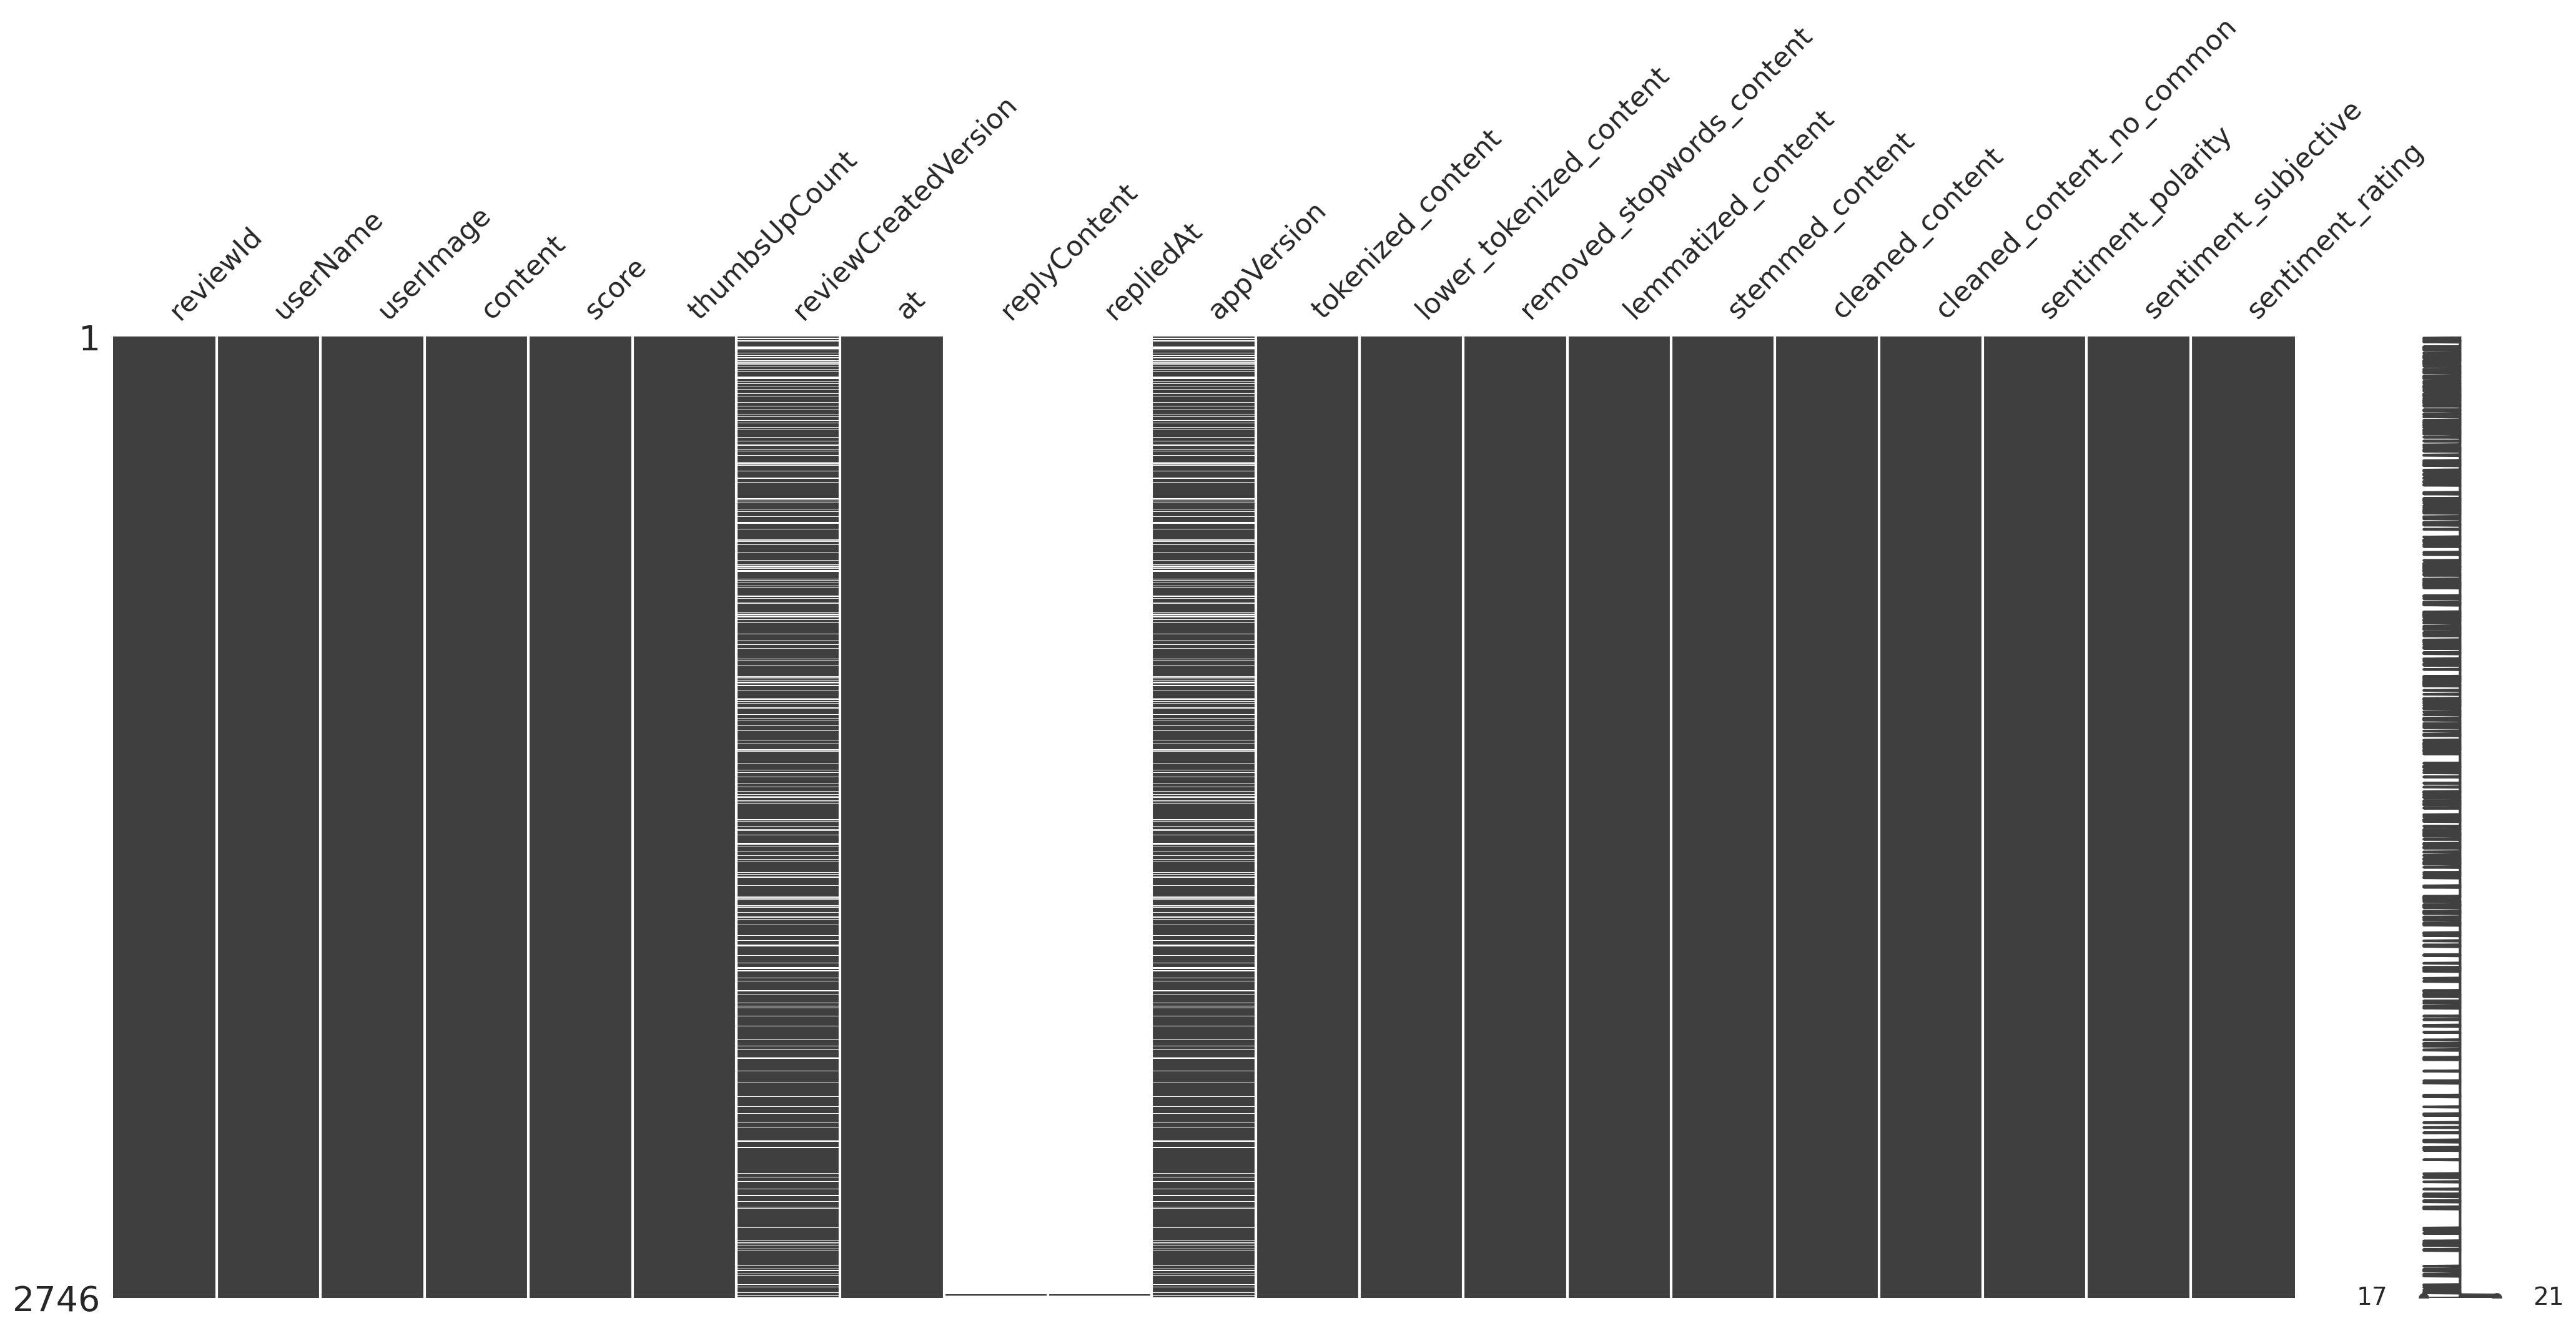

In [46]:
import missingno as msno
msno.matrix(df_tj)
plt.show()

In [48]:
# Assuming 'df_tj' is your DataFrame
df_tj['at'] = pd.to_datetime(df_tj['at'])
df_tj['year'] = df_tj['at'].dt.year

# Select only the desired columns
df_selected = df_tj[['content', 'cleaned_content_no_common', 'score', 'sentiment_rating', 'at', 'year']]

# Display the selected columns
df_selected

content  \
0     Udah hampir sempurna ini, mungkin bisa ditingk...   
1     kesalahan yang sering terjadi, versi yang lebi...   
2                                                    ok   
3     Tolong Gate scan nya Di perbaiki dan di bikin ...   
4     aplikasi tidak bisa memasukan kode otp selalu ...   
...                                                 ...   
2741                                            Mantaps   
2742              Sudah enggak crash kalau pilih profil   
2743  Aplikasi kocag, gk becus bikin aplikasi, masuk...   
2744  Aplikasi gak jelas, server eror, loading lama,...   
2745                                               wihh   

                              cleaned_content_no_common  score  \
0     udah sempurna tingkat ngehubungin data bu karn...      5   
1                                    salah versi tolong      4   
2                                                    ok      5   
3     tolong gate scan bikin mudah kadang kadang ngg...      5   
4                           aplikasi pasu kode otp eror      3   
...                                                 ...    ...   
2741                                             mantap      5   
2742                                 crash pilih profil      5   
2743  aplikasi kocag becu bikin aplikasi masuk kerja...      1   
2744  aplikasi server eror load cari rute susah posi...      1   
2745                                               wihh      5   

     sentiment_rating                  at  year  
0            Positive 2025-09-06 12:30:06  2025  
1            Positive 2025-09-06 11:03:16  2025  
2            Positive 2025-09-06 04:19:05  2025  
3            Positive 2025-09-06 01:45:32  2025  
4             Neutral 2025-09-05 17:19:45  2025  
...               ...                 ...   ...  
2741         Positive 2024-05-16 11:10:02  2024  
2742         Positive 2024-05-16 04:52:59  2024  
2743         Negative 2024-05-12 09:42:40  2024  
2744         Negative 2024-05-11 13:43:39  2024  
2745         Positive 2024-05-07 09:26:49  2024  

[2746 rows x 6 columns]

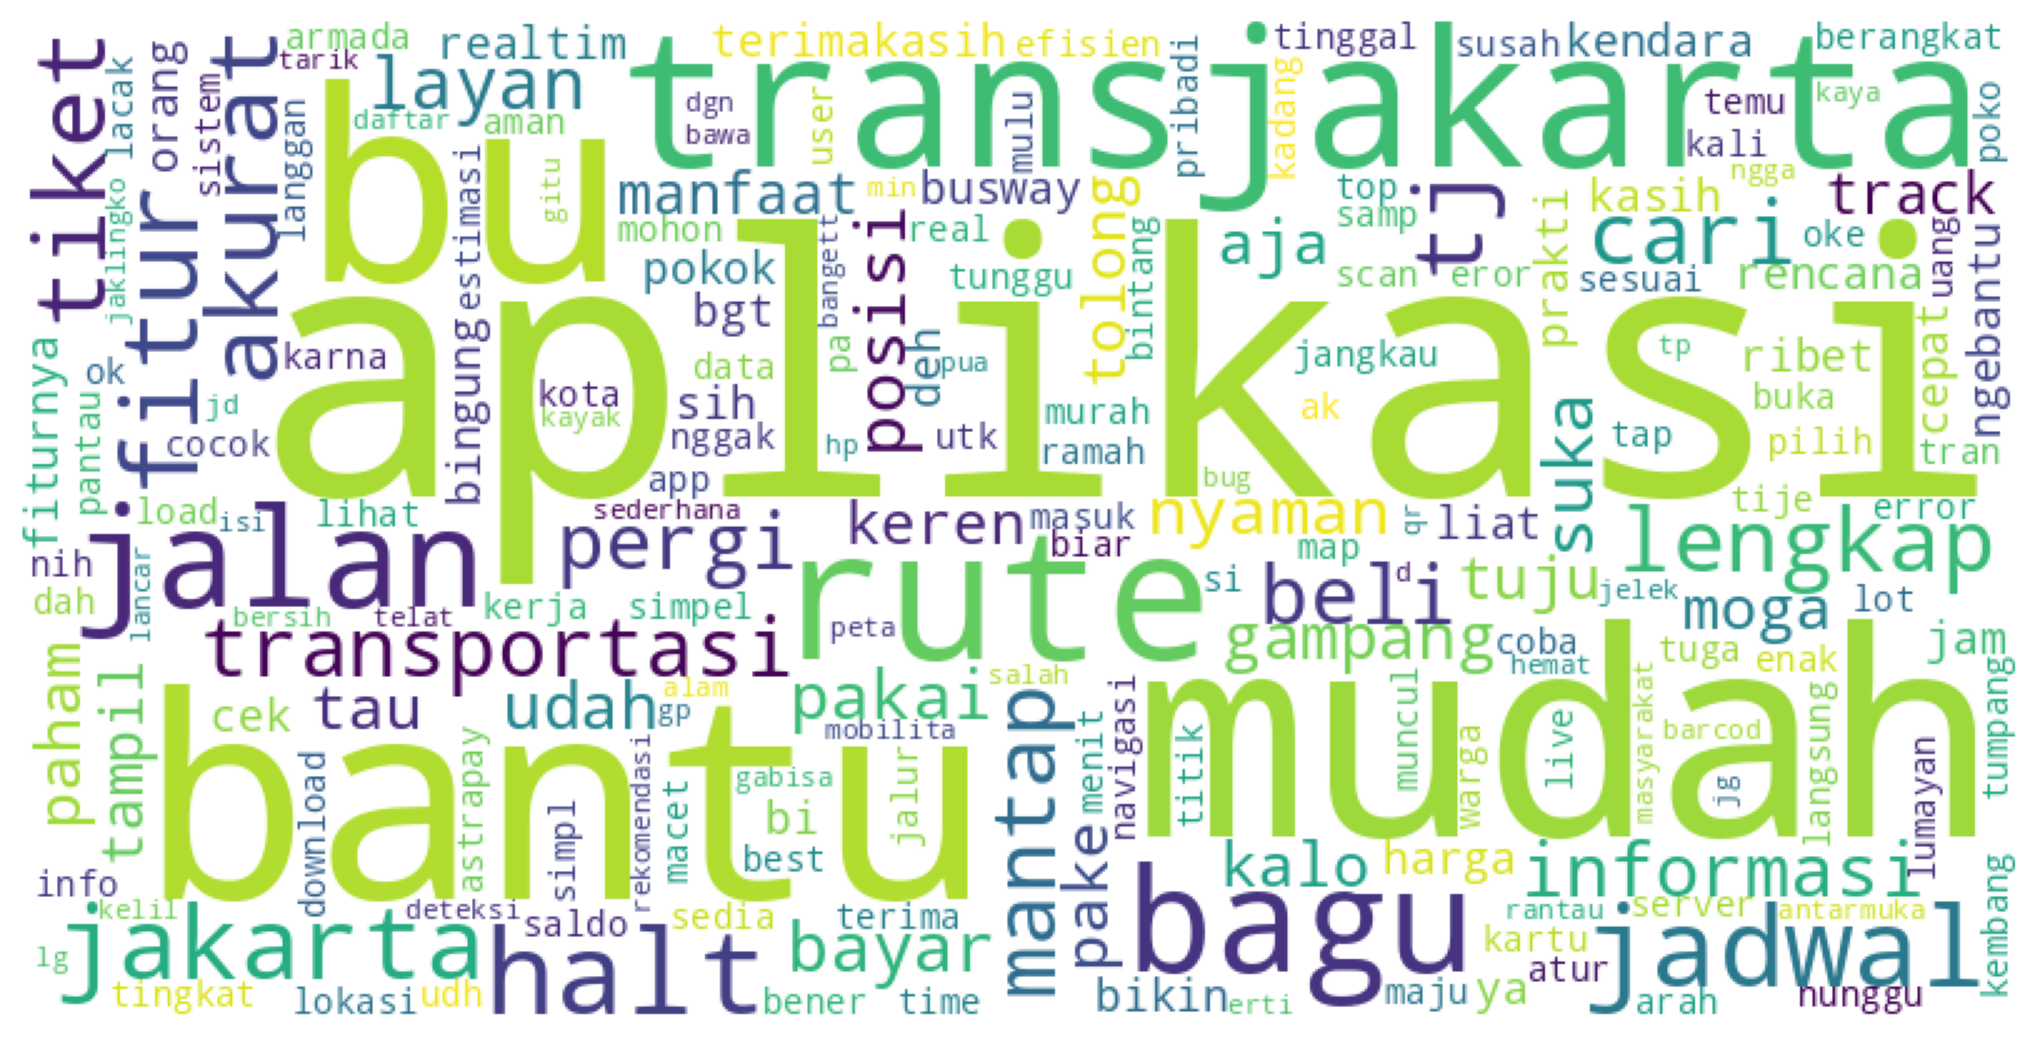

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(df_tj['cleaned_content_no_common'].dropna().astype(str))

# Create a WordCloud object with unique word functionality
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      collocations=False).generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

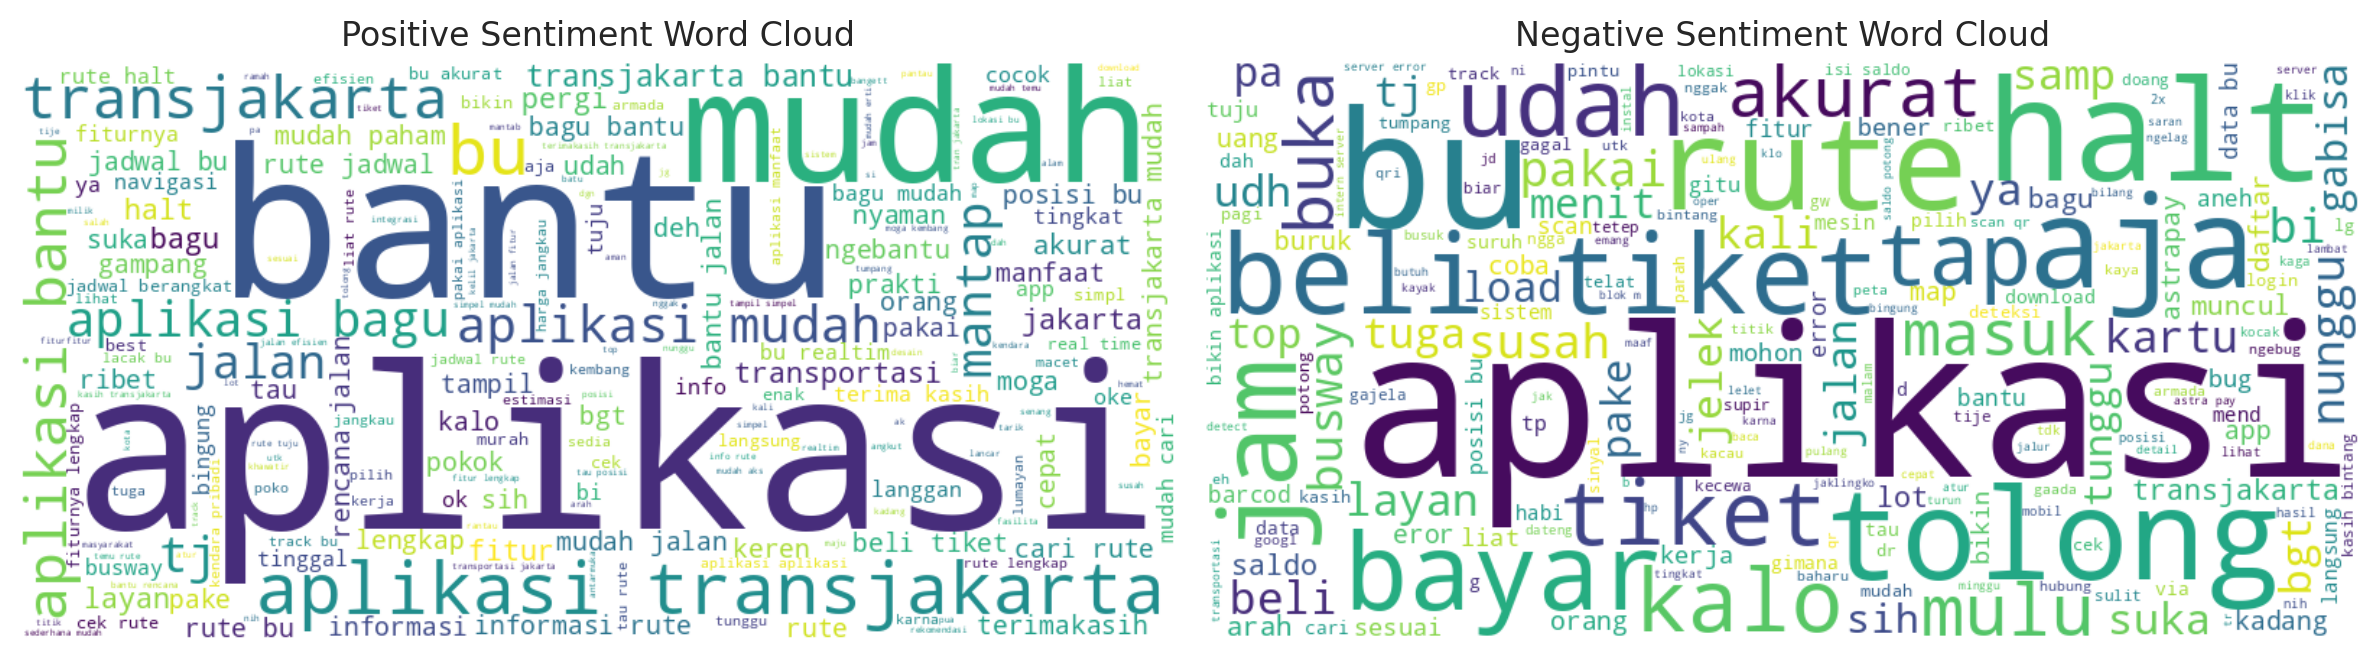

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate reviews into positive and negative sentiment groups
positive_reviews = df_tj[df_tj['sentiment_rating'] == 'Positive']['cleaned_content_no_common'].astype(str)
negative_reviews = df_tj[df_tj['sentiment_rating'] == 'Negative']['cleaned_content_no_common'].astype(str)

# Create word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis("off")

plt.tight_layout()
plt.show()

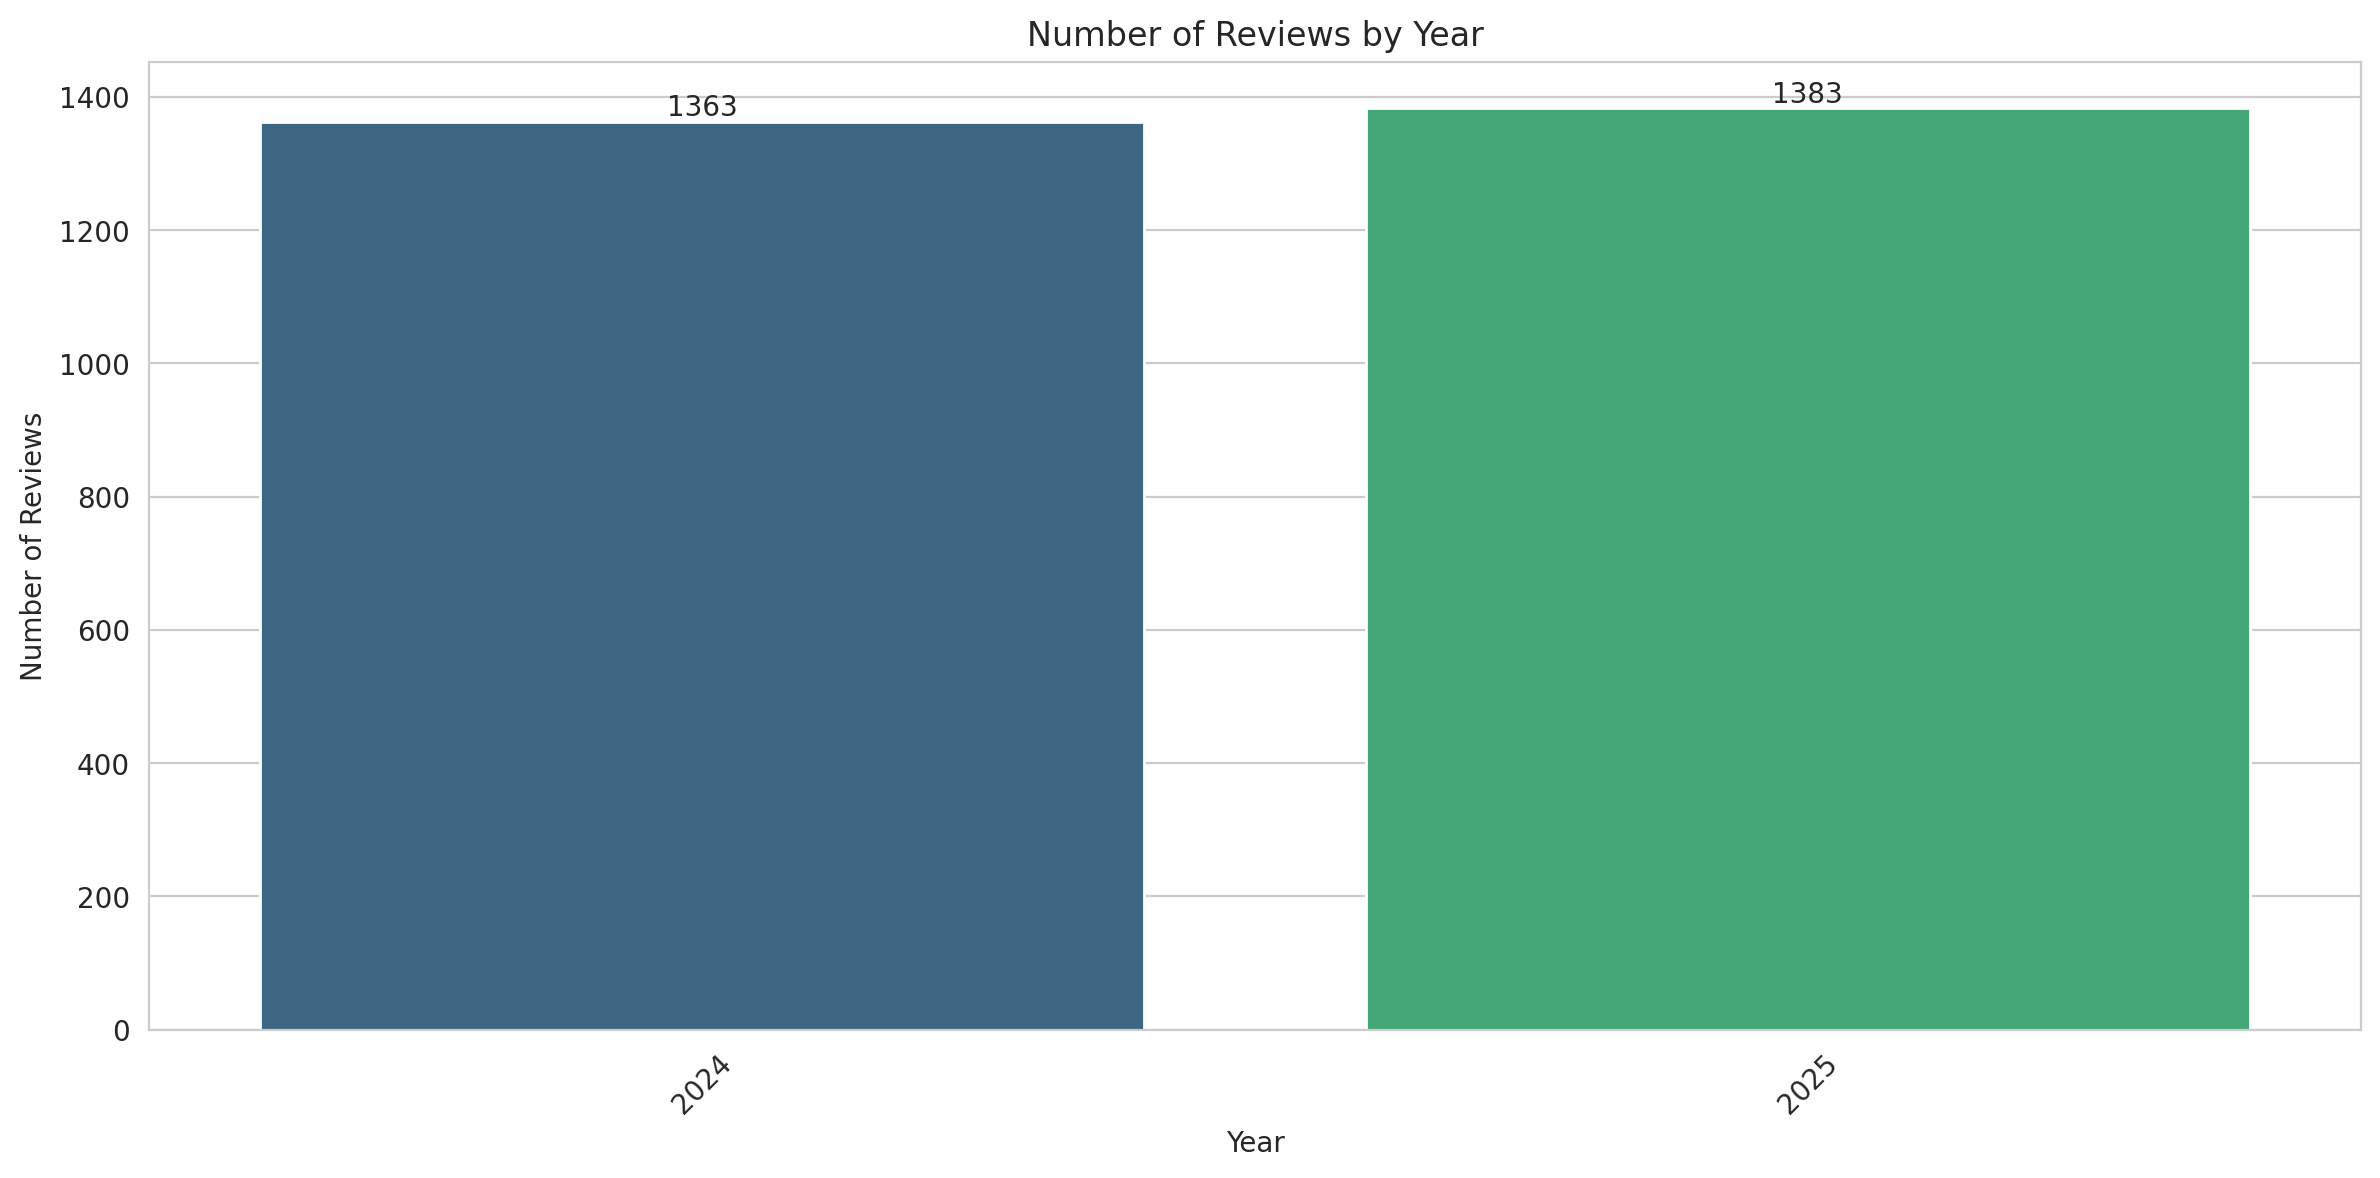

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and count the number of reviews
reviews_by_year = df_tj.groupby('year')['content'].count()

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=reviews_by_year.index, y=reviews_by_year.values, palette="viridis")

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Year")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

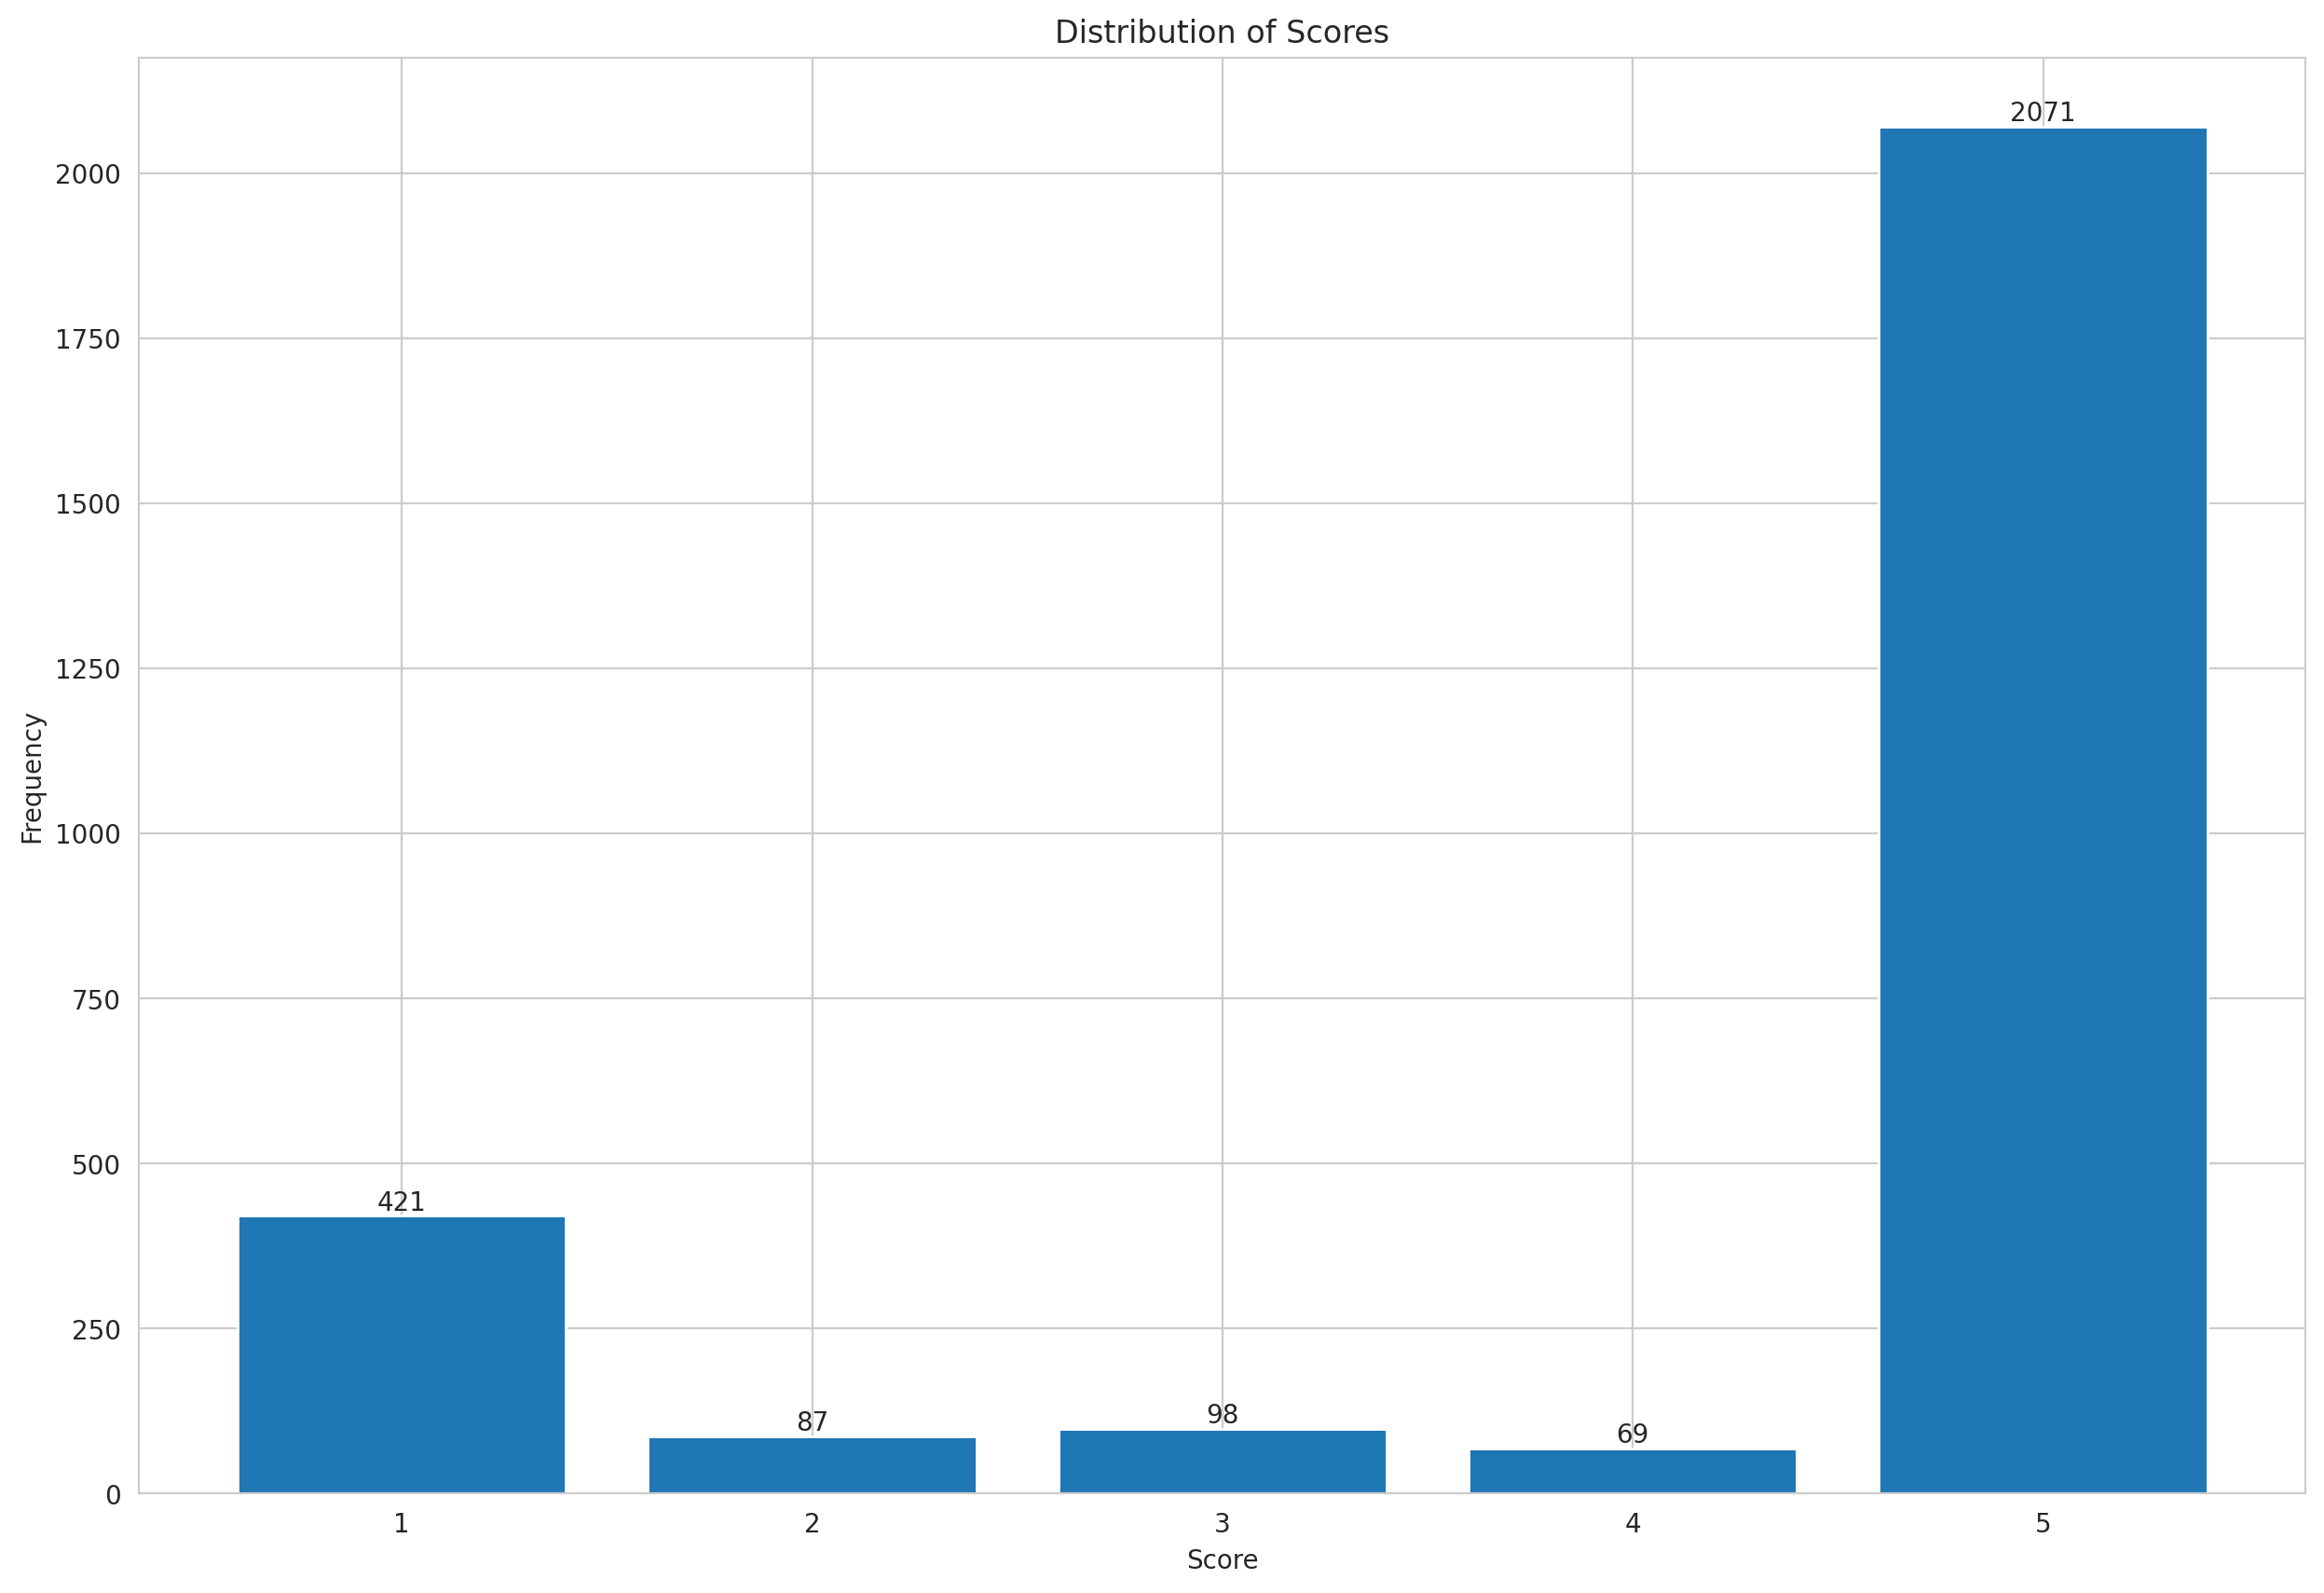

In [55]:
# Create the histogram of the 'score' column.
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df_tj['score'], bins=np.arange(1, 7) - 0.5, rwidth=0.8)

# Set the x-axis ticks to be the integers 1, 2, 3, 4, and 5.
ax.set_xticks([1, 2, 3, 4, 5])

# Add labels and a title for clarity.
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Scores')

# Add detail labels for each value (bar).
for count, patch in zip(counts, patches):
    # Get the x and y coordinates for the text
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    # Add the text label
    ax.text(x, y, str(int(count)), ha='center', va='bottom')

In [ ]:
# #save df to local
# df_tj.to_csv('df_tj_clean.csv', index=False)


# # To download the file to your local machine:
# from google.colab import files
# files.download('df_tj_clean.csv')

## BOW (Bag of Words)

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Muat data yang sudah bersih dari terakhir
try:
    df = pd.read_csv('df_tj_clean.csv')
    df['cleaned_content_no_common'].fillna('', inplace=True)
    print("File berhasil dimuat.")
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan Anda sudah menjalankan tahap sebelumnya.")

File berhasil dimuat.


In [3]:
# Inisialisasi CountVectorizer
# CountVectorizer untuk membuat model Bag of Words
vectorizer = CountVectorizer()

In [4]:
# Buat matriks Bag of Words
# .fit_transform() akan mempelajari kosakata dan mengubah teks menjadi matriks angka
bow_matrix = vectorizer.fit_transform(df['cleaned_content_no_common'])

In [5]:
# Mendapatkan daftar semua kata (kosakata) sebagai nama kolom
feature_names = vectorizer.get_feature_names_out()

# Konversi ke DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=feature_names)

print("\n--- Representasi Bag of Words (10 Ulasan Pertama) ---")
display(bow_df.iloc[:10, :15])


--- Representasi Bag of Words (10 Ulasan Pertama) ---


00  06  07  0720  09  10  100  1000  10000  10d  10h  10menit  10ribu  11  \
0   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
1   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
2   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
3   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
4   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
5   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
6   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
7   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
8   0   0   0     0   0   0    0     0      0    0    0        0       0   0   
9   0   0   0     0   0   0    0     0      0    0    0        0       0   0   

   11w  
0    0  
1    0  
2    0  
3    0  
4    0  
5    0  
6    0  
7    0  
8    0  
9    0

In [6]:
# Simpan hasil Bag of Words ke CSV
BOW_FILE = 'bow_features.csv'
bow_df.to_csv(BOW_FILE, index=False)
print(f"\nMatriks Bag of Words berhasil dibuat dan disimpan sebagai '{BOW_FILE}'.")
print(f"Jumlah total ulasan (dokumen): {bow_matrix.shape[0]}")
print(f"Jumlah total kata unik (kosakata/fitur): {bow_matrix.shape[1]}")


Matriks Bag of Words berhasil dibuat dan disimpan sebagai 'bow_features.csv'.
Jumlah total ulasan (dokumen): 2746
Jumlah total kata unik (kosakata/fitur): 2775


In [7]:
# Muat file Bag of Words
try:
    # Analisis Awal
    num_reviews, initial_vocab_size = bow_df.shape
    print(f"Ukuran Kosakata Awal: {initial_vocab_size} kata unik.")

    # Identifikasi dan Hapus Kata-kata Langka (Rare Words Removal)
    # Menghitung total kemunculan setiap kata di seluruh ulasan
    word_counts = bow_df.sum(axis=0)

    # Menentukan kata-kata yang hanya muncul sekali (threshold = 1)
    rare_words_threshold = 1
    rare_words = word_counts[word_counts <= rare_words_threshold].index.tolist()

    print(f"\nDitemukan {len(rare_words)} kata yang hanya muncul sekali.")
    if rare_words:
        print("Contoh kata-kata yang akan dihapus (kemungkinan typo/sangat spesifik):")
        print(rare_words[:20]) # Menampilkan 20 contoh pertama

    # Melakukan proses penghapusan
    bow_df_cleaned = bow_df.drop(columns=rare_words)
    final_vocab_size = bow_df_cleaned.shape[1]
    
    # Menampilkan Hasil
    print("\n--- Hasil Pembersihan ---")
    print(f"Ukuran Kosakata Awal\t: {initial_vocab_size} kata")
    print(f"Ukuran Kosakata Akhir\t: {final_vocab_size} kata")
    print(f"Jumlah Kata yang Dihapus\t: {initial_vocab_size - final_vocab_size} kata")

    # Menyimpan hasil ke file baru
    CLEANED_BOW_FILE = 'bow_features_cleaned.csv'
    bow_df_cleaned.to_csv(CLEANED_BOW_FILE, index=False)
    print(f"\nFile BoW yang sudah lebih bersih disimpan sebagai '{CLEANED_BOW_FILE}'.")


except FileNotFoundError:
    print("Error: File 'bow_features.csv' tidak ditemukan. Pastikan file berada di direktori yang sama dengan notebook Anda.")
except Exception as e:
    print(f"Terjadi error: {e}")


Ukuran Kosakata Awal: 2775 kata unik.

Ditemukan 1530 kata yang hanya muncul sekali.
Contoh kata-kata yang akan dihapus (kemungkinan typo/sangat spesifik):
['0720', '100', '1000', '10000', '10d', '10h', '10menit', '10ribu', '11', '11w', '120', '13b', '13e', '14a', '15rb', '16', '19', '1b', '1c', '1n']

--- Hasil Pembersihan ---
Ukuran Kosakata Awal	: 2775 kata
Ukuran Kosakata Akhir	: 1245 kata
Jumlah Kata yang Dihapus	: 1530 kata

File BoW yang sudah lebih bersih disimpan sebagai 'bow_features_cleaned.csv'.


## TF-IDF

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
try:
    # Load data fitur (X) dari BoW yang sudah bersih
    X = pd.read_csv('bow_features_cleaned.csv')
    
    # Muat data asli untuk mendapatkan label sentimen (y)
    df_labels = pd.read_csv('df_tj_clean.csv')
    y = df_labels['sentiment_rating']
    
    # Menghapus baris di mana sentimen adalah NaN (jika ada)
    # dan menyelaraskan X dan y
    valid_indices = y.notna()
    y = y[valid_indices]
    X = X[valid_indices]

    print("Data fitur (X) dan target (y) berhasil dimuat dan diselaraskan.")
    print(f"Jumlah data yang akan digunakan: {len(y)} ulasan.")

except FileNotFoundError as e:
    print(f"Error: File tidak ditemukan. {e}")
    # Hentikan eksekusi jika file tidak ada
    exit()

Data fitur (X) dan target (y) berhasil dimuat dan diselaraskan.
Jumlah data yang akan digunakan: 2746 ulasan.


In [10]:
# Membagi Data
# Kita bagi data menjadi 80% untuk melatih model dan 20% untuk menguji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, # random_state agar hasil pembagian data selalu sama
    stratify=y # stratify untuk memastikan proporsi sentimen sama di data train & test
)

print(f"\nData dibagi menjadi {len(X_train)} data latih dan {len(X_test)} data uji.")


Data dibagi menjadi 2196 data latih dan 550 data uji.


In [11]:
# Melatih Model Naive Bayes
# Kita menggunakan MultinomialNB yang cocok
model = MultinomialNB()
model.fit(X_train, y_train)

print("\nModel Naive Bayes berhasil dilatih.")


Model Naive Bayes berhasil dilatih.



--- Hasil Evaluasi Model ---
Akurasi Model: 87.64%

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.68      0.75      0.71       102
     Neutral       0.00      0.00      0.00        20
    Positive       0.95      0.95      0.95       428

    accuracy                           0.88       550
   macro avg       0.54      0.56      0.55       550
weighted avg       0.86      0.88      0.87       550


Confusion Matrix:


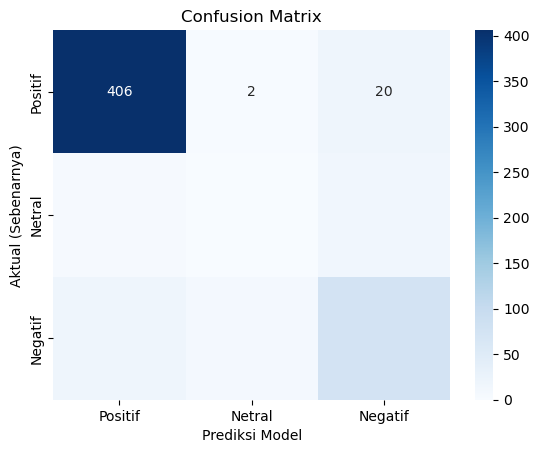

In [13]:
# Mengevaluasi Model
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Hasil Evaluasi Model ---")
print(f"Akurasi Model: {accuracy:.2%}")

# Tampilkan Laporan Klasifikasi (Precision, Recall, F1-Score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Tampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Positif', 'Netral', 'Negatif'], 
            yticklabels=['Positif', 'Netral', 'Negatif'])
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual (Sebenarnya)')
plt.title('Confusion Matrix')
plt.show()

Kosakata final yang akan digunakan untuk kedua model: 1245 kata.
Matriks TF-IDF berhasil dibuat dengan ukuran yang konsisten: (2746, 1245)

--- Tampilan Matriks TF-IDF (10 Ulasan Pertama dengan 15 kolom) ---


00   06   07   09   10   12  12b   13   14   15   1f  1jam   20  2024  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   

   2025  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
5   0.0  
6   0.0  
7   0.0  
8   0.0  
9   0.0

Data dibagi menjadi 2196 data latih dan 550 data uji.

Model Naive Bayes (TF-IDF) berhasil dilatih.

--- Hasil Evaluasi Model (TF-IDF) ---
Akurasi Model: 87.27%

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.77      0.61      0.68       102
     Neutral       0.00      0.00      0.00        20
    Positive       0.89      0.98      0.93       428

    accuracy                           0.87       550
   macro avg       0.55      0.53      0.54       550
weighted avg       0.84      0.87      0.85       550


Confusion Matrix:


c:\Users\Anas G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anas G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anas G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


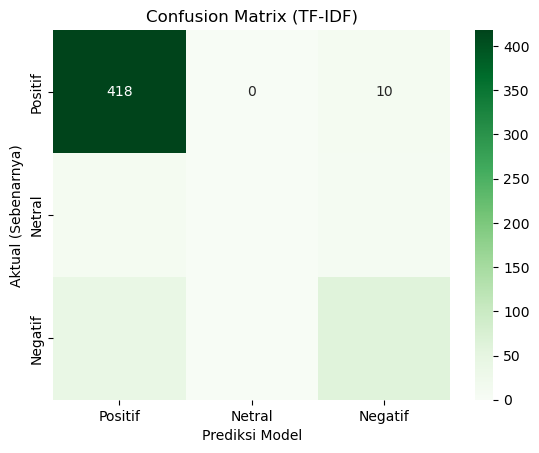

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # 1. Muat BoW yang sudah bersih HANYA untuk mengambil daftar katanya (kosakata)
    bow_cleaned_df = pd.read_csv('bow_features_cleaned.csv')
    final_vocabulary = bow_cleaned_df.columns.tolist()
    print(f"Kosakata final yang akan digunakan untuk kedua model: {len(final_vocabulary)} kata.")

    # 2. Muat data yang berisi TEKS BERSIH dan LABEL SENTIMEN
    # File ini adalah sumber teks sebelum kata-kata langka dihapus
    df_cleaned = pd.read_csv('df_tj_clean.csv')
    
    df_cleaned['cleaned_content_no_common'] = df_cleaned['cleaned_content_no_common'].fillna('')
    df_cleaned.dropna(subset=['sentiment_rating'], inplace=True)

    # 3. Persiapkan Input Teks dan Target Label
    X_text = df_cleaned['cleaned_content_no_common']
    y = df_cleaned['sentiment_rating']

    # 4. Buat Matriks TF-IDF dengan Kosakata yang Telah Ditentukan
    # Perhatikan parameter `vocabulary=final_vocabulary`
    tfidf_vectorizer = TfidfVectorizer(vocabulary=final_vocabulary)
    X_tfidf = tfidf_vectorizer.fit_transform(X_text)
    
    print(f"Matriks TF-IDF berhasil dibuat dengan ukuran yang konsisten: {X_tfidf.shape}")

    # Buat DataFrame dari matriks TF-IDF untuk ditampilkan
    tfidf_df_display = pd.DataFrame(X_tfidf.toarray(), columns=final_vocabulary)
    
    print("\n--- Tampilan Matriks TF-IDF (10 Ulasan Pertama dengan 15 kolom) ---")
    display(tfidf_df_display.iloc[:10, :15])

    # 5. Membagi Data
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )
    print(f"Data dibagi menjadi {len(y_train)} data latih dan {len(y_test)} data uji.")

    # 6. Latih dan Evaluasi Model
    model_tfidf = MultinomialNB()
    model_tfidf.fit(X_train, y_train)
    print("\nModel Naive Bayes (TF-IDF) berhasil dilatih.")

    y_pred = model_tfidf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- Hasil Evaluasi Model (TF-IDF) ---")
    print(f"Akurasi Model: {accuracy:.2%}")

    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['Positif', 'Netral', 'Negatif'], 
                yticklabels=['Positif', 'Netral', 'Negatif'])
    plt.xlabel('Prediksi Model')
    plt.ylabel('Aktual (Sebenarnya)')
    plt.title('Confusion Matrix (TF-IDF)')
    plt.show()

except FileNotFoundError as e:
    print(f"Error: Pastikan file 'bow_features_cleaned.csv' dan 'df_rosaliarev_cleaned_final.csv' ada di folder yang sama. {e}")

Matriks TF-IDF berhasil dibuat dengan ukuran: (2746, 1245)
Data dibagi menjadi 2196 data latih dan 550 data uji.

Model Logistic Regression berhasil dilatih.

--- Hasil Evaluasi Model (Logistic Regression) ---
Akurasi Model: 82.55%

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Positive       0.99      0.86      0.92       428
     Neutral       0.09      0.15      0.11        20
    Negative       0.57      0.80      0.67       102

    accuracy                           0.83       550
   macro avg       0.55      0.61      0.57       550
weighted avg       0.88      0.83      0.84       550


Confusion Matrix:


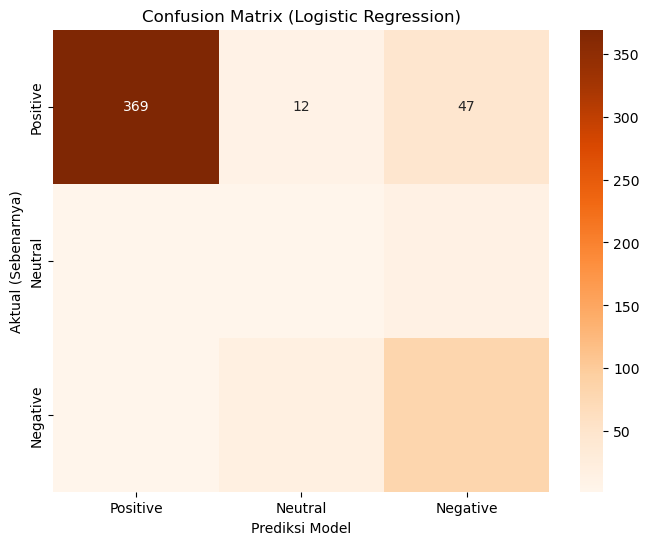

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

try:
    # 1. Muat BoW yang sudah bersih HANYA untuk mengambil daftar katanya (kosakata)
    bow_cleaned_df = pd.read_csv('bow_features_cleaned.csv')
    final_vocabulary = bow_cleaned_df.columns.tolist()

    # 2. Muat data yang berisi TEKS BERSIH dan LABEL SENTIMEN
    df_cleaned = pd.read_csv('df_tj_clean.csv')
    df_cleaned['cleaned_content_no_common'] = df_cleaned['cleaned_content_no_common'].fillna('')
    df_cleaned.dropna(subset=['sentiment_rating'], inplace=True)

    # 3. Persiapkan Input Teks dan Target Label
    X_text = df_cleaned['cleaned_content_no_common']
    y = df_cleaned['sentiment_rating']

    # 4. Buat Matriks TF-IDF dengan Kosakata yang Telah Ditentukan
    tfidf_vectorizer = TfidfVectorizer(vocabulary=final_vocabulary)
    X_tfidf = tfidf_vectorizer.fit_transform(X_text)
    
    print(f"Matriks TF-IDF berhasil dibuat dengan ukuran: {X_tfidf.shape}")

    # 5. Membagi Data (BAGIAN PERBAIKAN)
    # Anda sudah menggunakan stratify=y, ini adalah langkah yang benar
    # untuk memastikan data uji memiliki perwakilan dari setiap kelas.
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y  # <-- Ini adalah perbaikan kuncinya!
    )
    print(f"Data dibagi menjadi {len(y_train)} data latih dan {len(y_test)} data uji.")

    # 6. Latih Model Logistic Regression
    # Parameter class_weight='balanced' juga bagus untuk menangani data tidak seimbang
    logreg_model = LogisticRegression(
        class_weight='balanced', 
        random_state=42,
        max_iter=1000 # Menambah iterasi agar model konvergen
    )
    logreg_model.fit(X_train, y_train)
    print("\nModel Logistic Regression berhasil dilatih.")

    # 7. Evaluasi Model
    y_pred = logreg_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- Hasil Evaluasi Model (Logistic Regression) ---")
    print(f"Akurasi Model: {accuracy:.2%}")

    print("\nLaporan Klasifikasi:")
    # Mendefinisikan urutan label agar laporan dan plot konsisten
    labels_order = ['Positive', 'Neutral', 'Negative']
    print(classification_report(y_test, y_pred, labels=labels_order))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=labels_order)
    
    plt.figure(figsize=(8, 6)) # Menambahkan plt.figure agar ukuran plot teraplikasi
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
                xticklabels=labels_order, 
                yticklabels=labels_order)
    plt.xlabel('Prediksi Model')
    plt.ylabel('Aktual (Sebenarnya)')
    plt.title('Confusion Matrix (Logistic Regression)')
    plt.show()

except FileNotFoundError as e:
    print(f"Error: Pastikan file 'bow_features_cleaned.csv' dan 'df_tj_clean.csv' ada di folder yang sama. {e}")
except Exception as e:
    print(f"Terjadi error lain: {e}")